#1. Import Libraries & Data




In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
google_sheet_id = '1wqK9-cohC5FmXuGgdBkBkZjSDSz3f6fDgdiHdI33CSE'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
df = pd.read_excel(url, sheet_name ='kc_house_data' )

#2. Data Profiling


##2.1. First 10 rows


In [ ]:
pd.set_option('display.max_columns', None)
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##2.2. Data basic info


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#3. Data Cleaning

##3.1. Handling missing value

In [ ]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Dữ liệu đã đầy đủ, không chứa giá trị thiếu nên không cần xử lý missing data.

##3.2. Types fixing

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

for col in df.columns:
    if col != 'date':
        df[col] = df[col].astype(float)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  float64       
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  float64       
 9   view           21613 non-null  float64       
 10  condition      21613 non-null  float64       
 11  grade          21613 non-null  float64       
 12  sqft_above     21613 non-null  float64       
 13  sqft_basement  21613 non-null  float64       
 14  yr_built       21613 non-null  float64       
 15  yr_renovated   2161

Sửa dữ liệu về đúng định dạng: Cột date chuyển về dạng datetime64[ns], các cột còn lại về dữ liệu thích hợp.

##3.3. Remove duplicate


In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  float64       
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  float64       
 9   view           21613 non-null  float64       
 10  condition      21613 non-null  float64       
 11  grade          21613 non-null  float64       
 12  sqft_above     21613 non-null  float64       
 13  sqft_basement  21613 non-null  float64       
 14  yr_built       21613 non-null  float64       
 15  yr_renovated   2161

Kết quả cho thấy không có dòng trùng lặp nào, dữ liệu vẫn giữ nguyên với 21,613 dòng.

##3.3. Handling outliers

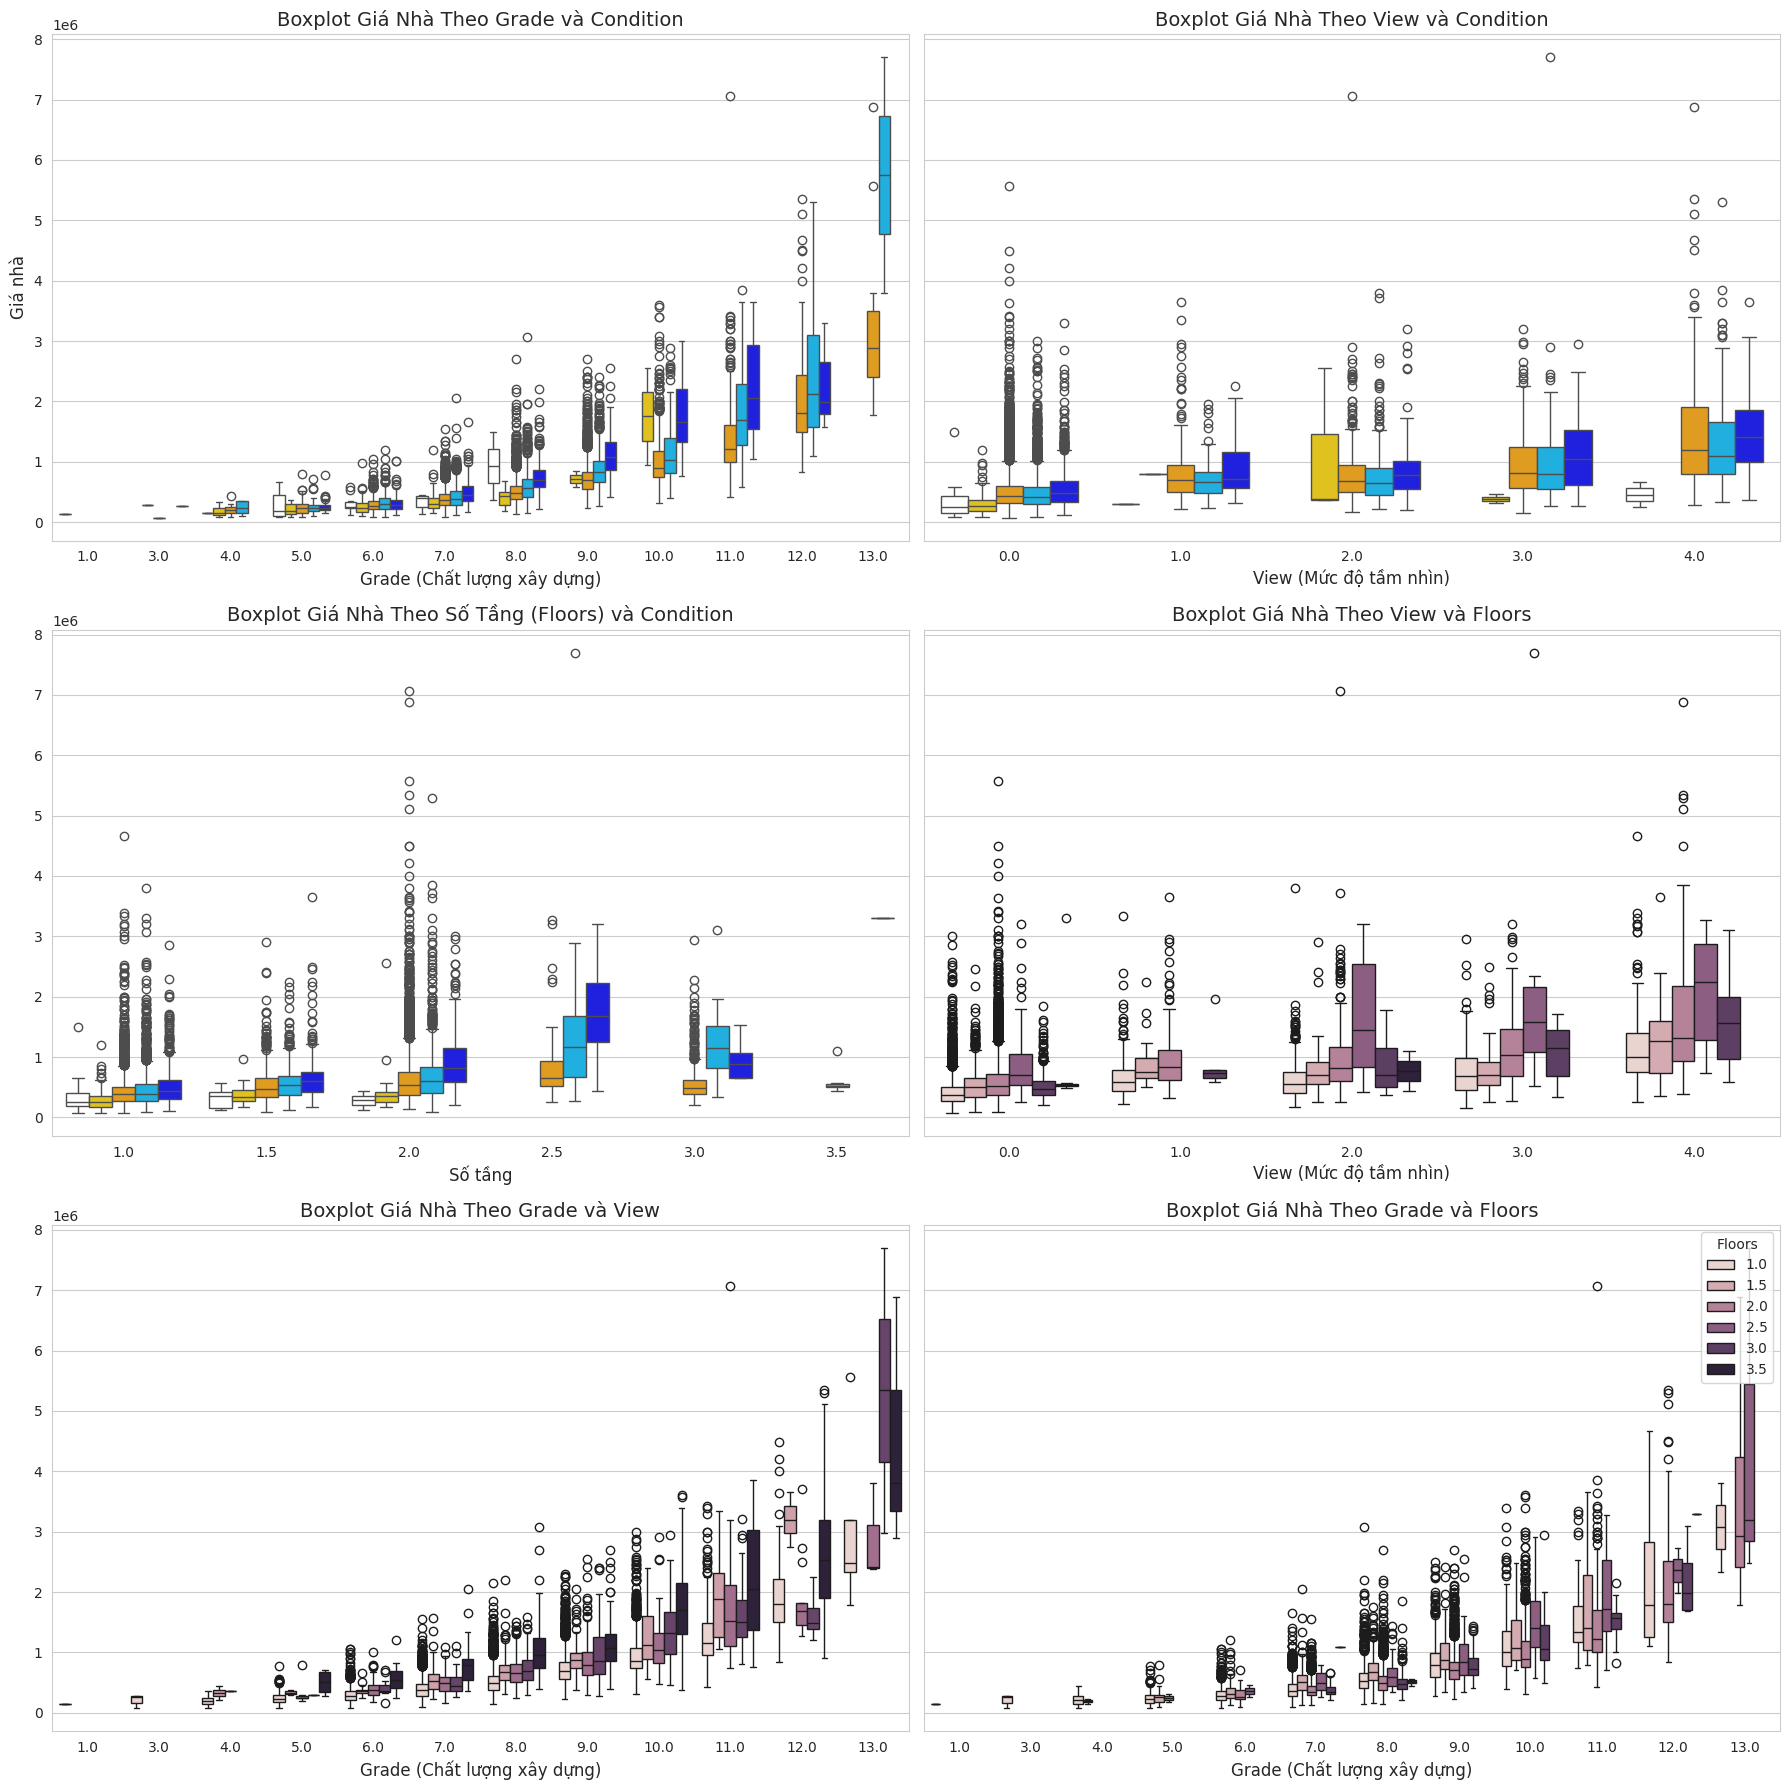

In [ ]:
# Tùy chỉnh bảng màu gradient theo condition (1 → 5)
custom_palette = {
    1: "#ffffff",  # Trắng
    2: "#ffd700",  # Vàng
    3: "#ffa500",  # Cam
    4: "#00bfff",  # Xanh da trời
    5: "#0000ff",  # Xanh dương
}

fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharey=True)
axes = axes.flatten()

# 1. Price vs Grade (hue = Condition)
sns.boxplot(ax=axes[0], x='grade', y='price', hue='condition', data=df, palette=custom_palette)
axes[0].set_title('Boxplot Giá Nhà Theo Grade và Condition', fontsize=14)
axes[0].set_xlabel('Grade (Chất lượng xây dựng)', fontsize=12)
axes[0].set_ylabel('Giá nhà', fontsize=12)
axes[0].legend_.remove()

# 2. Price vs View (hue = Condition)
sns.boxplot(ax=axes[1], x='view', y='price', hue='condition', data=df, palette=custom_palette)
axes[1].set_title('Boxplot Giá Nhà Theo View và Condition', fontsize=14)
axes[1].set_xlabel('View (Mức độ tầm nhìn)', fontsize=12)
axes[1].set_ylabel('')
axes[1].legend_.remove()

# 3. Price vs Floors (hue = Condition)
sns.boxplot(ax=axes[2], x='floors', y='price', hue='condition', data=df, palette=custom_palette)
axes[2].set_title('Boxplot Giá Nhà Theo Số Tầng (Floors) và Condition', fontsize=14)
axes[2].set_xlabel('Số tầng', fontsize=12)
axes[2].set_ylabel('')
axes[2].legend_.remove()

# 4. Price vs View (hue = Floors)
sns.boxplot(ax=axes[3], x='view', y='price', hue='floors', data=df)
axes[3].set_title('Boxplot Giá Nhà Theo View và Floors', fontsize=14)
axes[3].set_xlabel('View (Mức độ tầm nhìn)', fontsize=12)
axes[3].set_ylabel('Giá nhà', fontsize=12)
axes[3].legend_.remove()

# 5. Price vs Grade (hue = View)
sns.boxplot(ax=axes[4], x='grade', y='price', hue='view', data=df)
axes[4].set_title('Boxplot Giá Nhà Theo Grade và View', fontsize=14)
axes[4].set_xlabel('Grade (Chất lượng xây dựng)', fontsize=12)
axes[4].set_ylabel('')
axes[4].legend_.remove()

# 6. Price vs Grade (hue = Floors)
sns.boxplot(ax=axes[5], x='grade', y='price', hue='floors', data=df)
axes[5].set_title('Boxplot Giá Nhà Theo Grade và Floors', fontsize=14)
axes[5].set_xlabel('Grade (Chất lượng xây dựng)', fontsize=12)
axes[5].set_ylabel('')
# Hiển thị legend ở biểu đồ cuối cùng
handles, labels = axes[5].get_legend_handles_labels()
axes[5].legend(handles, labels, title="Floors", loc='upper right')

plt.tight_layout()
plt.show()
# Hàm xác định chỉ số outliers dựa trên 2 biến nhóm
def get_outlier_indices(df, g1, g2, target):
    outlier_indices = set()
    for v1 in df[g1].unique():
        for v2 in df[g2].unique():
            group_data = df[(df[g1] == v1) & (df[g2] == v2)][target]
            if len(group_data) < 5:
                continue
            q1 = group_data.quantile(0.25)
            q3 = group_data.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            mask = ((df[g1] == v1) & (df[g2] == v2) &
                    ((df[target] < lower) | (df[target] > upper)))
            outlier_indices.update(df[mask].index)
    return outlier_indices

# Xác định outliers từ 6 biểu đồ tổ hợp
out1 = get_outlier_indices(df, 'grade', 'condition', 'price')
out2 = get_outlier_indices(df, 'view', 'condition', 'price')
out3 = get_outlier_indices(df, 'floors', 'condition', 'price')
out4 = get_outlier_indices(df, 'view', 'floors', 'price')     # sửa lỗi ở đây
out5 = get_outlier_indices(df, 'grade', 'view', 'price')
out6 = get_outlier_indices(df, 'grade', 'floors', 'price')

# Giao của tất cả outliers – những điểm là outlier ở cả 6 biểu đồ
final_outliers = out1 & out2 & out3 & out4 & out5 & out6

# Xoá khỏi DataFrame gốc
df_cleaned_price = df.drop(index=final_outliers)



In [ ]:
df_cleaned_price.info()
df_cleaned_price.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 21475 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21475 non-null  float64       
 1   date           21475 non-null  datetime64[ns]
 2   price          21475 non-null  float64       
 3   bedrooms       21475 non-null  float64       
 4   bathrooms      21475 non-null  float64       
 5   sqft_living    21475 non-null  float64       
 6   sqft_lot       21475 non-null  float64       
 7   floors         21475 non-null  float64       
 8   waterfront     21475 non-null  float64       
 9   view           21475 non-null  float64       
 10  condition      21475 non-null  float64       
 11  grade          21475 non-null  float64       
 12  sqft_above     21475 non-null  float64       
 13  sqft_basement  21475 non-null  float64       
 14  yr_built       21475 non-null  float64       
 15  yr_renovated   21475 non

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.147500e+04,21475,2.147500e+04,21475.000000,21475.000000,21475.000000,2.147500e+04,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000
mean,4.582209e+09,2014-10-29 01:19:55.753201152,5.313861e+05,3.366286,2.108824,2070.007823,1.511383e+04,1.493295,0.007451,0.234412,3.410291,7.648289,1780.203632,289.804191,1971.020489,82.150547,98078.122002,47.559610,-122.213706,1980.437206,12768.554179
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469500,-122.329000,1480.000000,5100.000000
50%,3.904940e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.570800,-122.231000,1830.000000,7619.000000
75%,7.312300e+09,2015-02-17 00:00:00,6.390000e+05,4.000000,2.500000,2540.000000,1.062400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2350.000000,10050.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876977e+09,NaN,3.458438e+05,0.928194,0.764891,907.055948,4.154621e+04,0.540074,0.085996,0.766485,0.651473,1.171089,819.075533,440.533139,29.353121,396.503593,53.477115,0.138876,0.141186,680.326523,27385.708415


Nếu loại bỏ outliers dựa trên toàn bộ tập dữ liệu, ta có thể vô tình loại đi những biến outliers nhưng phù hợp với thực tế ví dụ như căn nhà tuy có giá cao vượt trội (outliers), nhưng lại hợp lý vì sở hữu các đặc điểm tốt như chất lượng xây dựng cao, tầm nhìn đẹp, hoặc nhiều tầng.

Vì vậy, em đã thực hiện trực quan hóa dữ liệu bằng biểu đồ boxplot của giá nhà (price) theo từng cặp biến đặc trưng gồm: grade, condition, view và floors. Sau khi phân tích từng biểu đồ, em chỉ loại bỏ những điểm được xác định là outliers nếu chúng xuất hiện đồng thời trong nhiều biểu đồ, nhằm đảm bảo việc xử lý outliers được hợp lý và có chọn lọc hơn.

In [ ]:
# Hàm nhóm diện tích sống
def assign_living_group(sqft):
    if sqft < 1100:
        return 1
    elif sqft <= 1680:
        return 2
    elif sqft <= 2350:
        return 3
    elif sqft <= 3250:
        return 4
    elif sqft <= 4150:
        return 5
    elif sqft <= 5100:
        return 6
    elif sqft <= 6500:
        return 7
    else:
        return 8

# Hàm xóa outliers theo nhóm
def remove_outliers_by_group(df, group_col, target_cols):
    cleaned_df = pd.DataFrame()
    for group in sorted(df[group_col].dropna().unique()):
        group_data = df[df[group_col] == group]
        for col in target_cols:
            Q1 = group_data[col].quantile(0.25)
            Q3 = group_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            group_data = group_data[(group_data[col] >= lower) & (group_data[col] <= upper)]
        cleaned_df = pd.concat([cleaned_df, group_data], ignore_index=True)

    return cleaned_df.reset_index(drop=True)

# Áp dụng lên df_cleaned_price để lọc tiếp bedrooms, bathrooms theo từng nhóm diện tích
df_temp = df_cleaned_price.copy()
df_temp['living_group'] = df_temp['sqft_living'].apply(assign_living_group)

df_cleaned_room = remove_outliers_by_group(df_temp, 'living_group', ['bedrooms', 'bathrooms','sqft_basement','sqft_above'])

# Xóa cột phụ
df_cleaned_room.drop(columns=['living_group'], inplace=True)

# Kiểm tra kết quả
df_cleaned_room.info()
df_cleaned_room.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17358 entries, 0 to 17357
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17358 non-null  float64       
 1   date           17358 non-null  datetime64[ns]
 2   price          17358 non-null  float64       
 3   bedrooms       17358 non-null  float64       
 4   bathrooms      17358 non-null  float64       
 5   sqft_living    17358 non-null  float64       
 6   sqft_lot       17358 non-null  float64       
 7   floors         17358 non-null  float64       
 8   waterfront     17358 non-null  float64       
 9   view           17358 non-null  float64       
 10  condition      17358 non-null  float64       
 11  grade          17358 non-null  float64       
 12  sqft_above     17358 non-null  float64       
 13  sqft_basement  17358 non-null  float64       
 14  yr_built       17358 non-null  float64       
 15  yr_renovated   1735

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.735800e+04,17358,1.735800e+04,17358.000000,17358.000000,17358.000000,1.735800e+04,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.00000,17358.000000,17358.000000
mean,4.582528e+09,2014-10-28 05:21:42.868994048,5.427353e+05,3.406729,2.157694,2142.384261,1.556657e+04,1.511320,0.007317,0.235281,3.402927,7.737124,1861.856666,280.527595,1973.259074,75.192879,98074.097938,47.554724,-122.20319,2042.207973,13169.576679
min,1.200019e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.750000,500.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,500.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51500,399.000000,651.000000
25%,2.123049e+09,2014-07-21 00:00:00,3.244625e+05,3.000000,1.750000,1510.000000,5.350500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1250.000000,0.000000,1955.000000,0.000000,98031.000000,47.455100,-122.31900,1530.000000,5399.250000
50%,3.905030e+09,2014-10-15 00:00:00,4.550000e+05,3.000000,2.250000,1990.000000,7.820000e+03,1.500000,0.000000,0.000000,3.000000,8.000000,1650.000000,0.000000,1977.000000,0.000000,98058.000000,47.566700,-122.21100,1910.000000,7800.000000
75%,7.312400e+09,2015-02-14 00:00:00,6.500000e+05,4.000000,2.500000,2570.000000,1.094450e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2300.000000,530.000000,1998.000000,0.000000,98116.000000,47.676975,-122.11400,2430.000000,10295.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,8.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8570.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,6210.000000,871200.000000
std,2.876737e+09,NaN,3.592134e+05,0.785978,0.736859,922.929056,4.027892e+04,0.539024,0.085226,0.768733,0.642807,1.189473,836.235066,445.819323,28.342277,380.035576,52.894147,0.141445,0.14096,696.007614,27378.573823


Tương tự như với giá nhà, nếu loại bỏ outliers của bedrooms, bathrooms, sqft_basement, sqft_above một cách tổng thể, ta có thể xóa nhầm những căn nhà có nhiều phòng tắm, phòng ngủ cũng như có diện tích tầng hầm lớn, đây là điều hoàn toàn hợp lý đối với những căn nhà có diện tích lớn.

Vì vậy, em đã chia diện tích sử dụng (sqft_living) thành 8 nhóm từ nhỏ đến lớn thích hợp. Sau đó, em sử dụng biểu đồ boxplot để kiểm tra và loại bỏ outliers của bedrooms,bathrooms, sqft_basement, sqft_above trong từng nhóm diện tích riêng biệt. Cách tiếp cận này giúp đảm bảo việc xử lý outliers chính xác và phù hợp
ngữ cảnh thực tế của dữ liệu.

In [ ]:
# Bước 1: Tạo nhóm giá
def assign_price_group(price):
    if price < 250000:
        return '1'
    elif price < 500000:
        return '2'
    elif price < 750000:
        return '3'
    elif price < 1000000:
        return '4'
    elif price < 1500000:
        return '5'
    elif price < 2000000:
        return '6'
    elif price < 4000000:
        return '7'
    else:
        return '8'

df_cleaned_room['price_group'] = df_cleaned_room['price'].apply(assign_price_group)

# Bước 2: Hàm xóa outliers theo nhóm giá (IQR)
def remove_outliers_by_price_group(df, group_col, target_cols):
    cleaned_df = pd.DataFrame()

    for group in sorted(df[group_col].dropna().unique()):
        group_data = df[df[group_col] == group].copy()

        for col in target_cols:
            Q1 = group_data[col].quantile(0.25)
            Q3 = group_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            group_data = group_data[(group_data[col] >= lower) & (group_data[col] <= upper)]

        cleaned_df = pd.concat([cleaned_df, group_data], ignore_index=True)

    return cleaned_df.reset_index(drop=True)

# Bước 3: Áp dụng cho sqft_lot và sqft_lot15
target_columns = ['sqft_living','sqft_living15' ,'sqft_lot', 'sqft_lot15']
df_cleaned = remove_outliers_by_price_group(df_cleaned_room, 'price_group', target_columns)
df_cleaned.drop(columns=['price_group'], inplace=True)
# Bước 4: Kiểm tra

df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             14720 non-null  float64       
 1   date           14720 non-null  datetime64[ns]
 2   price          14720 non-null  float64       
 3   bedrooms       14720 non-null  float64       
 4   bathrooms      14720 non-null  float64       
 5   sqft_living    14720 non-null  float64       
 6   sqft_lot       14720 non-null  float64       
 7   floors         14720 non-null  float64       
 8   waterfront     14720 non-null  float64       
 9   view           14720 non-null  float64       
 10  condition      14720 non-null  float64       
 11  grade          14720 non-null  float64       
 12  sqft_above     14720 non-null  float64       
 13  sqft_basement  14720 non-null  float64       
 14  yr_built       14720 non-null  float64       
 15  yr_renovated   1472

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.472000e+04,14720,1.472000e+04,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000
mean,4.753158e+09,2014-10-29 03:05:05.217391360,5.355619e+05,3.382609,2.121060,2052.656318,7541.560462,1.509715,0.006046,0.220992,3.406861,7.657880,1778.601698,274.054620,1972.273845,72.968274,98077.172690,47.560487,-122.218913,1970.206997,7354.649457
min,2.800031e+06,2014-05-02 00:00:00,8.100000e+04,1.000000,0.750000,500.000000,609.000000,1.000000,0.000000,0.000000,1.000000,4.000000,500.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.475000,620.000000,651.000000
25%,2.310108e+09,2014-07-22 00:00:00,3.190000e+05,3.000000,1.750000,1470.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1220.000000,0.000000,1953.000000,0.000000,98033.000000,47.475975,-122.327000,1500.000000,5075.500000
50%,4.083302e+09,2014-10-16 00:00:00,4.460000e+05,3.000000,2.250000,1930.000000,7286.500000,1.500000,0.000000,0.000000,3.000000,7.000000,1590.000000,0.000000,1976.000000,0.000000,98059.000000,47.571600,-122.229000,1840.000000,7378.000000
75%,7.504401e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2440.000000,9450.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2180.000000,520.000000,1998.000000,0.000000,98117.000000,47.678325,-122.141000,2316.250000,9104.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,6.000000,8.000000,12050.000000,45517.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8570.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5220.000000,28475.000000
std,2.871641e+09,NaN,3.589020e+05,0.778872,0.719094,848.606743,3682.126010,0.546972,0.077524,0.743480,0.647567,1.125554,763.601251,428.994463,29.295474,374.662505,53.688001,0.137350,0.131753,652.928293,3166.356356


Việc loại bỏ outliers của sqft_living, sqft_living15, sqft_lot và sqft_lot15 trên toàn bộ tập dữ liệu có thể khiến ta xóa nhầm những căn có diện tích lớn nhưng mức giá tương xứng – điều này hoàn toàn hợp lý với các biệt thự cao cấp.

Do đó, em đã chia dữ liệu thành 8 nhóm giá dựa trên biến price, từ dưới 250.000 đến trên 4 triệu đô. Sau đó, em sử dụng phương pháp IQR để phát hiện và loại bỏ outliers diện tích trong từng nhóm giá riêng biệt. Cách tiếp cận này giúp giữ lại những điểm dữ liệu hợp lý và phù hợp với đặc điểm thị trường thực tế của từng phân khúc bất động sản.

Sau khi xong bước xử lý bộ data còn 14720 dữ liệu (giảm 6893 dòng)


#4. EDA

##4.1 Những chỉ số chính của Data

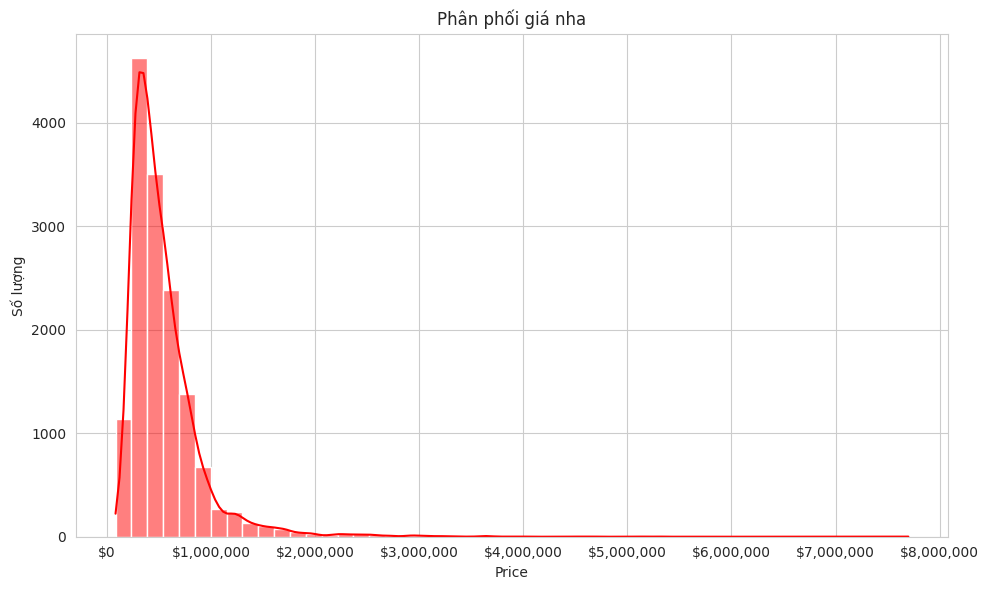

In [ ]:
import matplotlib.ticker as ticker # Import the ticker module
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_cleaned,
    x='price',
    bins=50,
    kde=True,
    color='red'
)

# Nhãn và tiêu đề
plt.title('Phân phối giá nha')
plt.xlabel('Price')
plt.ylabel('Số lượng')

# Định dạng trục x thành tiền tệ có dấu phẩy
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.tight_layout()
plt.show()

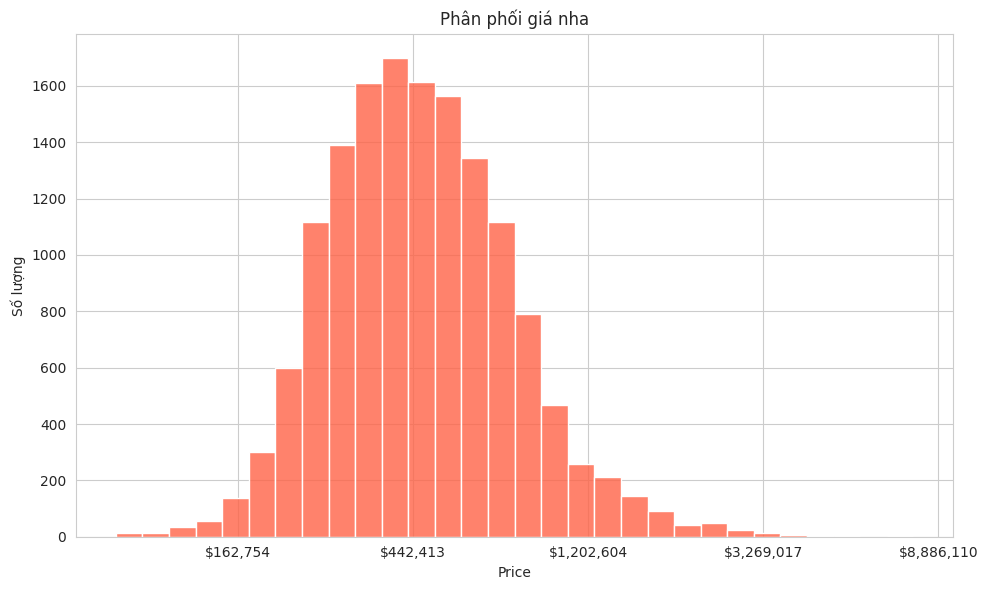

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df_cleaned['price']), bins=30, color='tomato', alpha=0.8)

# Định dạng trục x về đơn vị giá gốc
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${int(np.exp(x)):,}"))

# Nhãn và tiêu đề
plt.xlabel('Price')
plt.ylabel('Số lượng')
plt.title('Phân phối giá nha')
plt.tight_layout()
plt.show()

Sử dụng biến đổi log (logarithmic transformation) đây là một kỹ thuật toán học được sử dụng nhằm điều chỉnh các biến có phân phối lệch (skewed distribution) trở nên gần với phân phối chuẩn hơn. Giúp dễ phân tích hơn.

Giá nhà phân bố tập trung trong khoảng từ 200.000 – 800.000USD.

Các căn giá trên $2 triệu là rất hiếm, chủ yếu là biệt thự hoặc nhà ở các khu cao cấp.



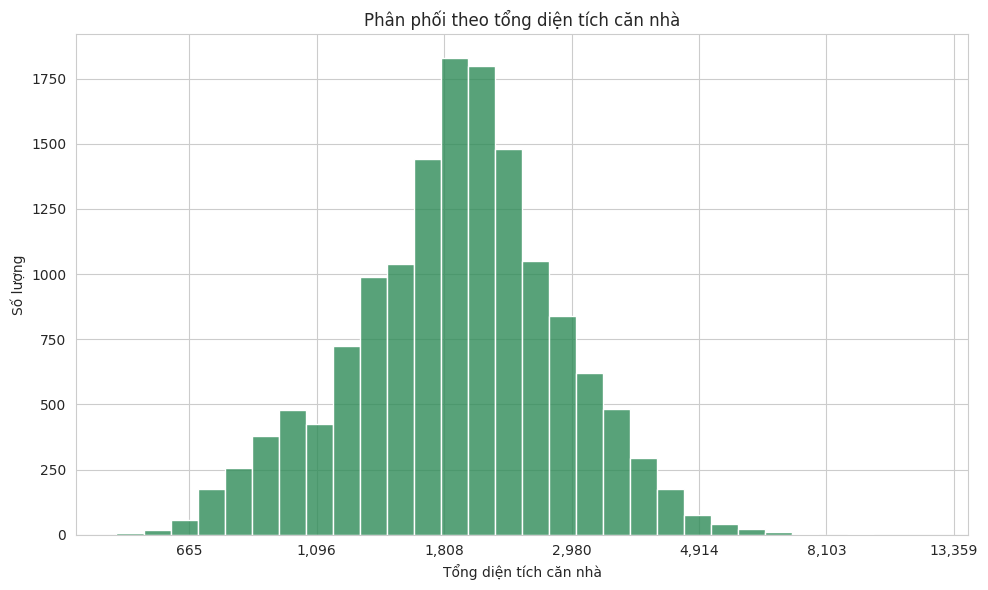

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df_cleaned['sqft_living']), bins=30, color='seagreen', alpha=0.8)

# Định dạng trục x về đơn vị giá gốc
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(np.exp(x)):,}"))


# Nhãn và tiêu đề
plt.xlabel('Tổng diện tích căn nhà')
plt.ylabel('Số lượng')
plt.title('Phân phối theo tổng diện tích căn nhà')
plt.tight_layout()
plt.show()

Phân phối phần lớn tập trung quanh mức 1.500 – 2.500 sqft.

Nhà diện tích lớn thường xuất hiện ít hơn nhưng lại đi kèm với phân khúc cao cấp và giá trị cao

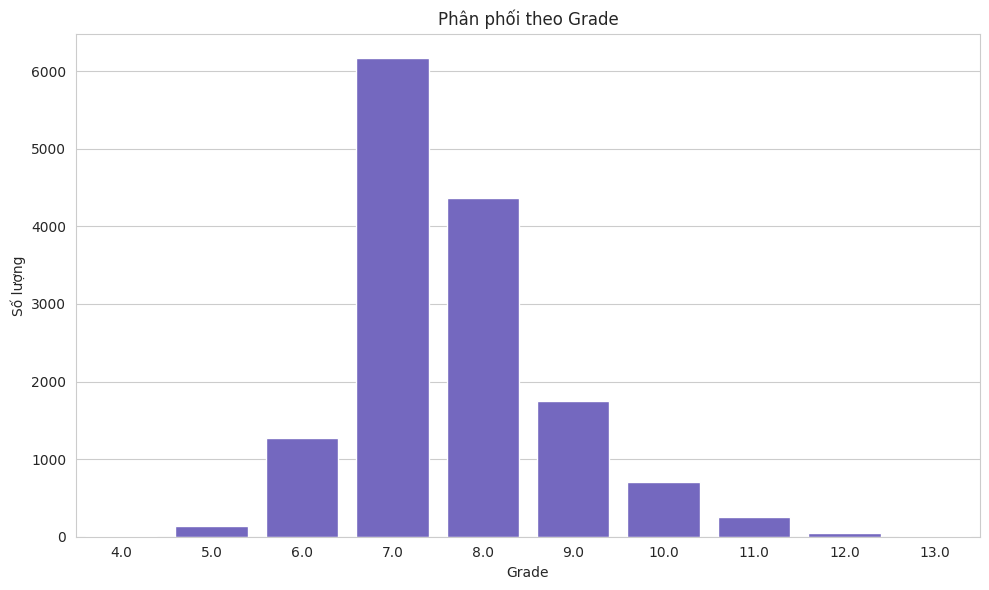

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x='grade', color='slateblue')
plt.xlabel('Grade')
plt.ylabel('Số lượng')
plt.title('Phân phối theo Grade')
plt.tight_layout()
plt.show()


Phần lớn các căn có chất lượng ở mức 7 và 8 – đây là phân khúc phổ biến, chiếm phần lớn thị trường.

Các căn có grade từ 10 trở lên rất ít, đại diện cho nhóm nhà cao cấp, thường có diện tích lớn và giá cao.

In [ ]:
import plotly.express as px
fig = px.scatter_mapbox(
    df_cleaned,
    lat="lat",
    lon="long",
    color="price",
    size="price",
    color_continuous_scale="Viridis",
    size_max=15,
    zoom=10,
    mapbox_style="carto-positron",
    title="Bản đồ giá nhà theo vị trí",
    width=1500,         # Chiều rộng
    height=1200          # Chiều cao
)
fig.update_layout(
    title_x=0.5,  # căn giữa theo chiều ngang
    title_font_size=28  # tăng cỡ chữ tiêu đề
)
fig.show()


Các căn có giá trị cao tập trung tại trung tâm Seattle, Bellevue và các khu ven hồ – đây là khu vực có vị trí thuận lợi và nhiều tiện ích.

Các vùng xa hơn hoặc nông thôn thường có mật độ nhà thấp hơn và giá trị nhà cũng thấp hơn rõ rệt.

Khuyến nghị:

Người mua:

Nếu tài chính vừa phải, nên ưu tiên những căn diện tích ~1.800 sqft, grade 7–8 để tối ưu giữa chất lượng và chi phí.

Người bán:

Những căn diện tích rộng, chất lượng cao nên làm nổi bật trong marketing vì có tiềm năng bán giá cao.

Có thể đầu tư vào cải tạo để nâng grade và từ đó tăng giá trị bán lại.

Nhà đầu tư:

Các khu vực quanh trung tâm Seattle, Bellevue, và gần hồ là những điểm nóng có tiềm năng tăng giá.

Đầu tư cải tạo vào nhà có grade trung bình nhưng vị trí tốt có thể là chiến lược nâng giá hiệu quả.



##4.2. Giá nhà theo năm xây dựng và những ảnh hưởng của việc cải tạo

/tmp/ipython-input-258-34874675.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




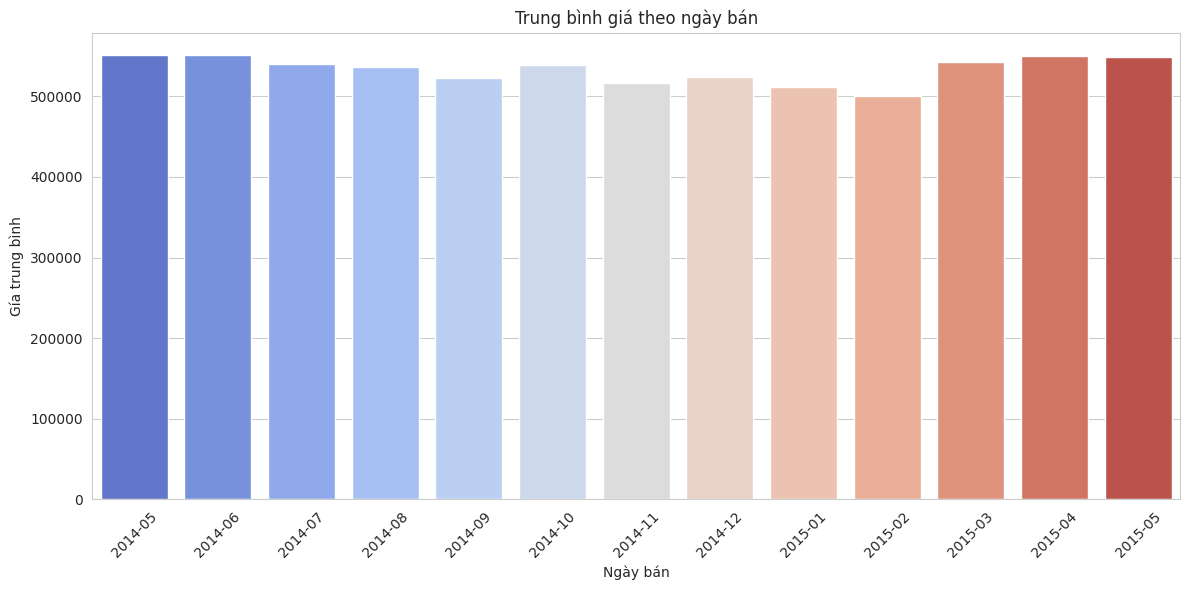

In [ ]:
# Chuyển ngày sang datetime
dates = pd.to_datetime(df_cleaned['date'])

# Trích xuất tháng-năm dưới dạng chuỗi: 'YYYY-MM'
month_year = dates.dt.to_period('M').astype(str)

# Tính giá trung bình theo từng tháng-năm
avg_price_by_monthyear = df_cleaned.groupby(month_year)['price'].mean().reset_index()
avg_price_by_monthyear.columns = ['month_year', 'avg_price']

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_by_monthyear, x='month_year', y='avg_price', palette='coolwarm')

plt.title('Trung bình giá theo ngày bán')
plt.xlabel('Ngày bán')
plt.ylabel('Gía trung bình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dữ liệu mua bán chỉ kèo dài 1 năm nên không có biến động gì về giá.

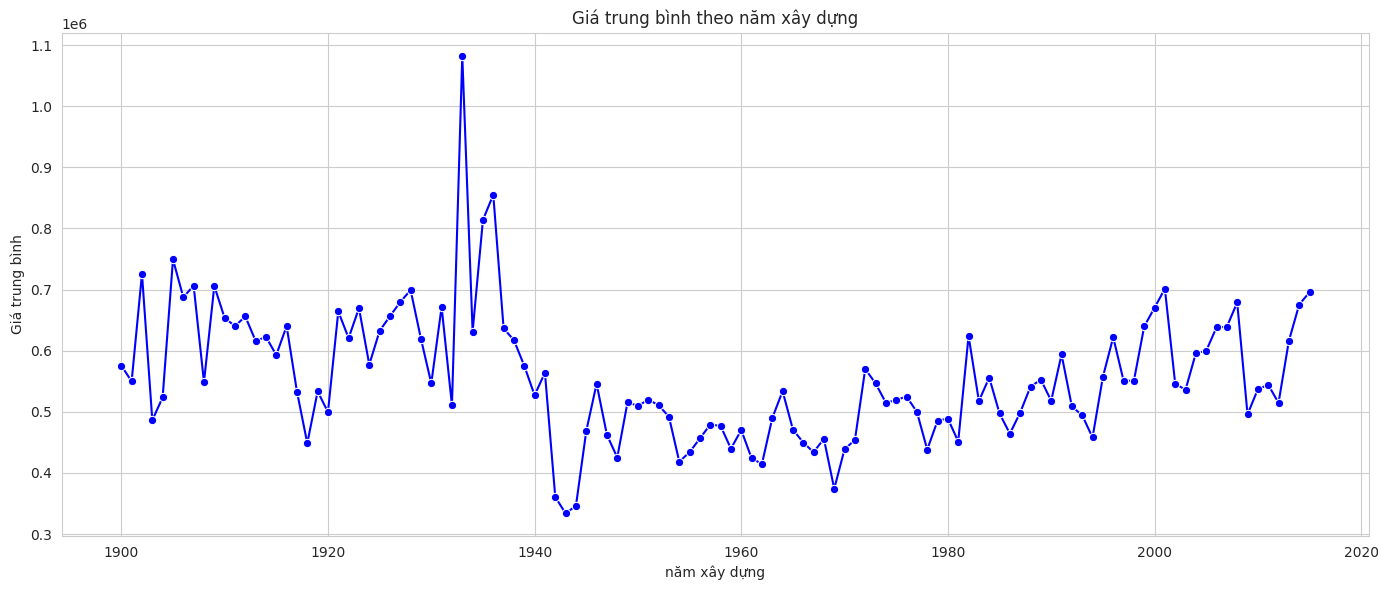

In [ ]:
# Tính giá trung bình theo năm xây dựng
avg_price_by_yr_built = df_cleaned.groupby('yr_built')['price'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(14,6))
sns.lineplot(data=avg_price_by_yr_built, x='yr_built', y='price', marker='o', color='blue')

plt.title('Giá trung bình theo năm xây dựng')
plt.xlabel('năm xây dựng')
plt.ylabel('Giá trung bình')
plt.grid(True)
plt.tight_layout()
plt.show()


Quan sát từ biểu đồ cho thấy yếu tố năm xây dựng không có ảnh hưởng lớn đến giá nhà, khi phần lớn mức giá dao động trong khoảng từ 400.000 đến 800.000 USD, bất kể căn nhà được xây vào thời điểm nào.

Tuy nhiên, giai đoạn 1930–1945 ghi nhận mức giá trung bình biến động bất thường – có năm giá cao đột biến, có năm lại giảm mạnh.

Để lý giải hiện tượng này, em tiếp tục vẽ thêm các biểu đồ liên quan đến chất lượng căn nhà (grade), vị trí gần mặt nước (waterfront) và tổng diện tích sử dụng – vì đây là các yếu tố có khả năng tác động mạnh đến giá nhà, bất kể thời điểm xây dựng.



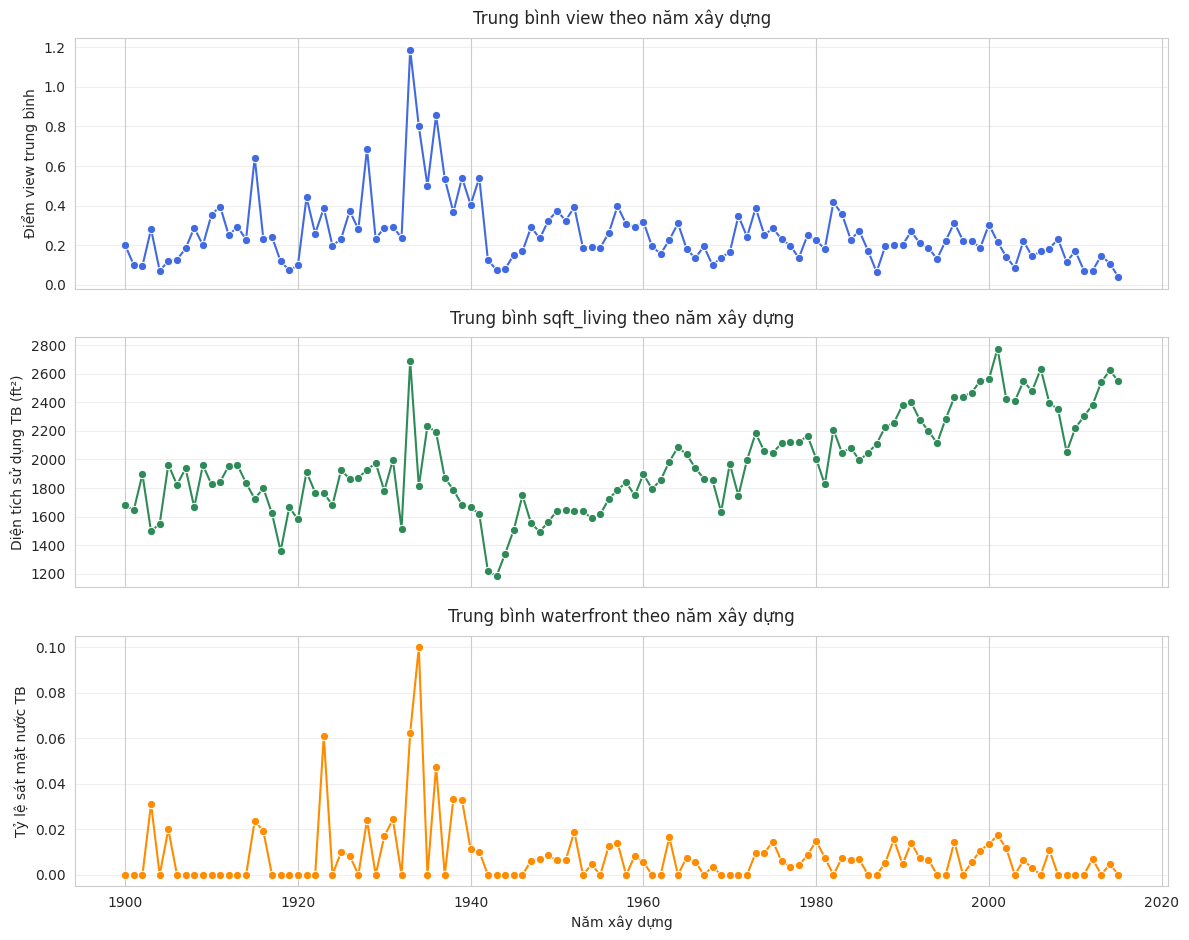

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")      # phông nền nhẹ

# ----- Khai báo cột muốn vẽ & nhãn tiếng Việt -----
targets = {
    "view": {
        "color": "royalblue",
        "ylabel": "Điểm view trung bình"
    },
    "sqft_living": {
        "color": "seagreen",
        "ylabel": "Diện tích sử dụng TB (ft²)"
    },
    "waterfront": {
        "color": "darkorange",
        "ylabel": "Tỷ lệ sát mặt nước TB"
    },
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 9.5), sharex=True)

for ax, (col, opts) in zip(axes, targets.items()):
    # 1) Tính giá trị trung bình theo năm xây dựng
    avg_by_year = (
        df_cleaned.groupby('yr_built')[col]
        .mean()
        .reset_index()
    )

    # 2) Vẽ đường
    sns.lineplot(
        data=avg_by_year,
        x='yr_built', y=col,
        marker='o', color=opts["color"],
        ax=ax
    )

    # 3) Trang trí subplot (Tiếng Việt)
    ax.set_title(f"Trung bình {col} theo năm xây dựng", pad=10)
    ax.set_ylabel(opts["ylabel"])
    ax.grid(True, axis='y', alpha=0.3)

# ----- Hoàn thiện bố cục -----
axes[-1].set_xlabel("Năm xây dựng")
plt.tight_layout()
plt.show()


Ba biểu đồ bổ sung gồm chất lượng căn nhà (grade), vị trí gần mặt nước (waterfront) và tổng diện tích căn nhà (sqft_living) cho thấy sự tương đồng đáng kể với xu hướng giá nhà theo năm xây dựng.

Cụ thể, những biến động bất thường trong khoảng năm 1930–1945 trên biểu đồ giá nhà – với các mức giá trung bình đột ngột tăng cao hoặc giảm mạnh – cũng xuất hiện ở các biểu đồ còn lại. Một số căn nhà trong giai đoạn này có diện tích lớn vượt trội, chất lượng xây dựng cao (grade cao), hoặc nằm gần mặt nước, vốn là các yếu tố có ảnh hưởng mạnh mẽ đến giá bán.

Điều này cho thấy rằng giá nhà tại một số thời điểm không chỉ phụ thuộc vào năm xây dựng, mà còn bị chi phối bởi các đặc điểm nội tại khác của bất động sản như chất lượng, diện tích và vị trí.

Do đó, những điểm “ngoại lệ” về giá trong giai đoạn này không nhất thiết phản ánh tác động của yếu tố thời gian, mà là hệ quả của các đặc điểm vật lý và vị trí cụ thể của từng căn nhà – từ đó làm rõ thêm mối quan hệ giữa các yếu tố và giúp tránh hiểu nhầm khi đánh giá dữ liệu theo từng biến độc lập.

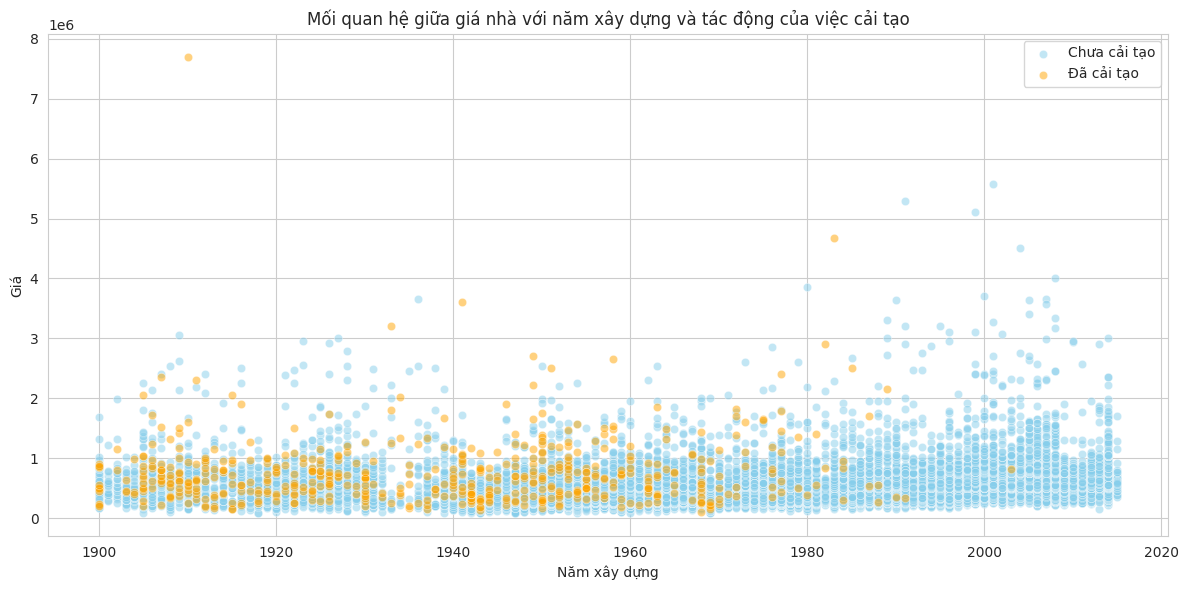

In [ ]:
plt.figure(figsize=(12, 6))

# Vẽ điểm chưa từng renovate (yr_renovated == 0 hoặc 1)
sns.scatterplot(
    data=df_cleaned[df_cleaned['yr_renovated'] == 0],
    x='yr_built', y='price',
    color='skyblue', label='Chưa cải tạo', alpha=0.5
)

# Vẽ điểm đã renovate (yr_renovated > 1)
sns.scatterplot(
    data=df_cleaned[df_cleaned['yr_renovated'] > 1],
    x='yr_built', y='price',
    color='orange', label='Đã cải tạo', alpha=0.5
)

# Nhãn và tiêu đề
plt.title('Mối quan hệ giữa giá nhà với năm xây dựng và tác động của việc cải tạo')
plt.xlabel('Năm xây dựng')
plt.ylabel('Giá')
plt.legend()
plt.tight_layout()
plt.show()

Dựa vào biểu đồ phân tán thể hiện mối quan hệ giữa năm xây dựng và giá nhà theo hai nhóm “đã cải tạo” và “chưa cải tạo”, có thể nhận thấy rằng những căn nhà được cải tạo trước năm 1980 thường có mức giá cao hơn so với những căn chưa cải tạo cùng thời điểm.

Đặc biệt, nhiều căn nhà xây dựng trước năm 1980 vẫn đạt mức giá từ 2 triệu USD trở lên, cho thấy việc cải tạo có thể giúp gia tăng đáng kể giá trị tài sản, ngay cả đối với các công trình đã cũ. Điều này củng cố nhận định rằng yếu tố cải tạo đóng vai trò quan trọng đến giá trị nhà.

/tmp/ipython-input-262-1556995466.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




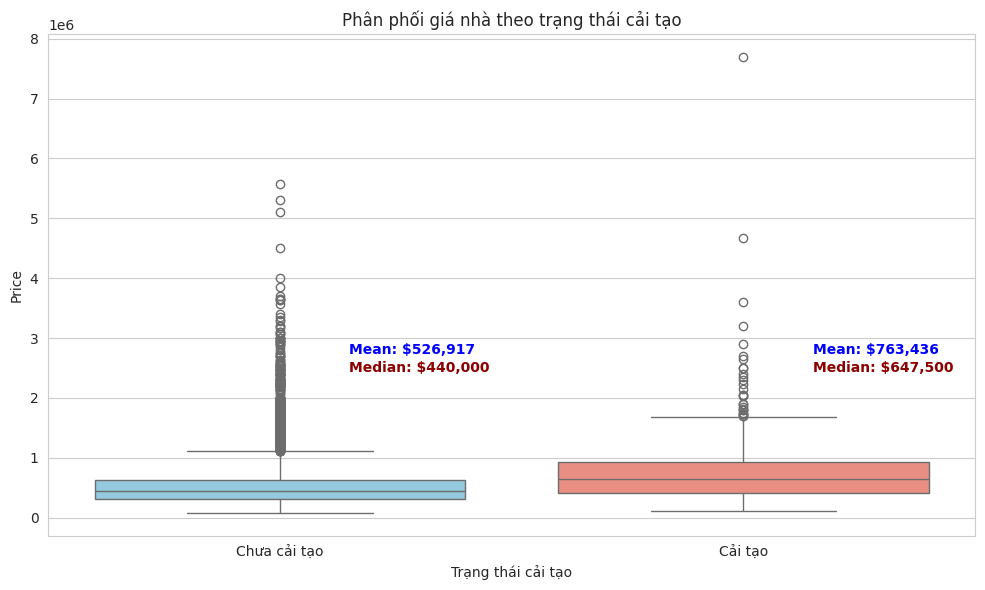

In [ ]:
# Tạo bản sao tạm thời với cột 'renovated_status' dùng để vẽ
df_viz = df_cleaned.copy()
df_viz['renovated_status'] = df_viz['yr_renovated'].apply(lambda x: 'Cải tạo' if x > 1 else 'Chưa cải tạo')

# Vẽ boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_viz,
    x='renovated_status',  # Corrected column name
    y='price',
    palette=['skyblue', 'salmon']
)

# Tính trung bình & trung vị
grouped = df_viz.groupby('renovated_status')['price'].agg(['mean', 'median'])

# Ghi chú mean/median
ymin, ymax = ax.get_ylim()
y_text = ymax - 0.65 * (ymax - ymin)
offset = 0.15

for i, status in enumerate(grouped.index):
    mean_val = int(grouped.loc[status, 'mean'])
    median_val = int(grouped.loc[status, 'median'])

    ax.text(i + offset, y_text + 100000, f"Mean: ${mean_val:,}", color='blue', fontsize=10, weight='bold')
    ax.text(i + offset, y_text - 200000, f"Median: ${median_val:,}", color='darkred', fontsize=10, weight='bold')

# Nhãn & tiêu đề
plt.title('Phân phối giá nhà theo trạng thái cải tạo')
plt.xlabel('Trạng thái cải tạo')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

Biểu đồ boxplot thể hiện sự khác biệt rõ rệt về giá nhà giữa hai nhóm “đã cải tạo” và “chưa cải tạo”. Cụ thể, giá trung bình (mean) của nhóm đã cải tạo cao hơn khoảng 236,000 USD, trong khi giá trung vị (median) cũng tăng thêm hơn 200,000 USD. Điều này cho thấy rằng việc cải tạo không chỉ nâng cao giá trị trung bình mà còn đẩy mặt bằng giá chung lên đáng kể, khẳng định vai trò quan trọng của cải tạo trong việc gia tăng giá trị bất động sản.

/tmp/ipython-input-263-3887753282.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



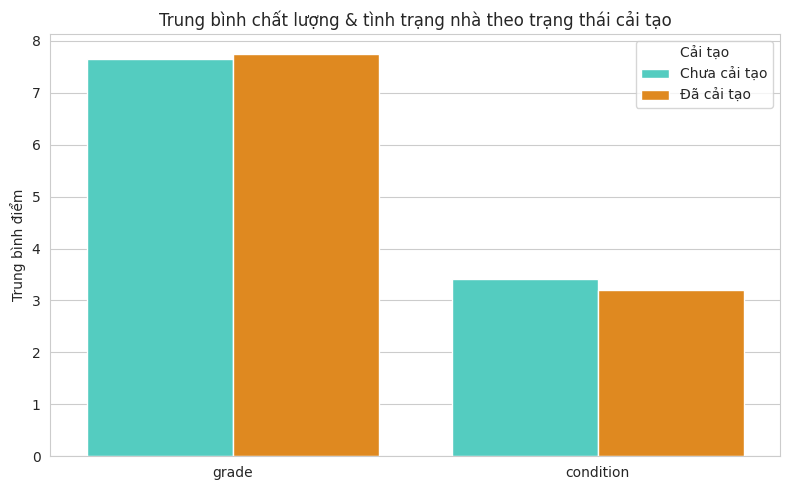

In [ ]:
avg_values = (
    df_cleaned
    .assign(renovated=lambda d: (d['yr_renovated'] > 0).astype(int))          # 0 = No, 1 = Yes
    .groupby('renovated')[['grade', 'condition']]
    .mean()
    .reset_index()
)

# 2. Melt để vẽ seaborn
avg_melt = avg_values.melt(id_vars='renovated', var_name='Feature', value_name='Average')

# 3. Palette rõ ràng cho 2 trạng thái
palette = {0: 'turquoise', 1: 'darkorange'}

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=avg_melt,
    x='Feature', y='Average',
    hue='renovated', palette=palette
)
# 4. Việt hoá & trang trí
ax.set_title('Trung bình chất lượng & tình trạng nhà theo trạng thái cải tạo')
ax.set_xlabel('')
ax.set_ylabel('Trung bình điểm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# 5. Tạo lại legend màu sắc
legend_labels = ['Chưa cải tạo', 'Đã cải tạo']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title='Cải tạo', loc='upper right')
plt.tight_layout()
plt.show()


Khi phân tích thêm biểu đồ cột thể hiện mối liên hệ giữa việc cải tạo với hai yếu tố chất lượng nhà (grade) và điều kiện vật lý (condition), có thể thấy rằng tỉ lệ các cấp độ ở cả hai đặc điểm này gần như không thay đổi giữa nhóm đã cải tạo và chưa cải tạo. Tuy nhiên, ở 2 biểu đồ ở phía dưới đều được chứng minh cả “grade” và “condition”  là có ảnh hưởng mạnh đến giá nhà.

Sự chênh lệch về giá giữa hai nhóm cải tạo và chưa cải tạo, trong khi các đặc điểm chất lượng không đổi, cho thấy rằng người mua có xu hướng đánh giá cao những căn nhà đã cải tạo, có thể do yếu tố tâm lý hoặc cảm nhận về tính mới và sẵn sàng chi trả mức giá cao hơn. Tuy nhiên, mức giá này có khả năng vượt quá giá trị thực dựa trên các yếu tố vật lý cốt lõi.

Về phía người bán, nếu không muốn đầu tư quá nhiều chi phí vào nâng cấp cấu trúc, hãy chú trọng đến cải tạo thẩm mỹ, chỉnh trang không gian vẫn có thể tạo được ấn tượng tốt và bán được với giá cao hơn kỳ vọng, nhờ vào tác động tâm lý của người mua đối với trạng thái “đã cải tạo”.











/tmp/ipython-input-264-2965606323.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-264-2965606323.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




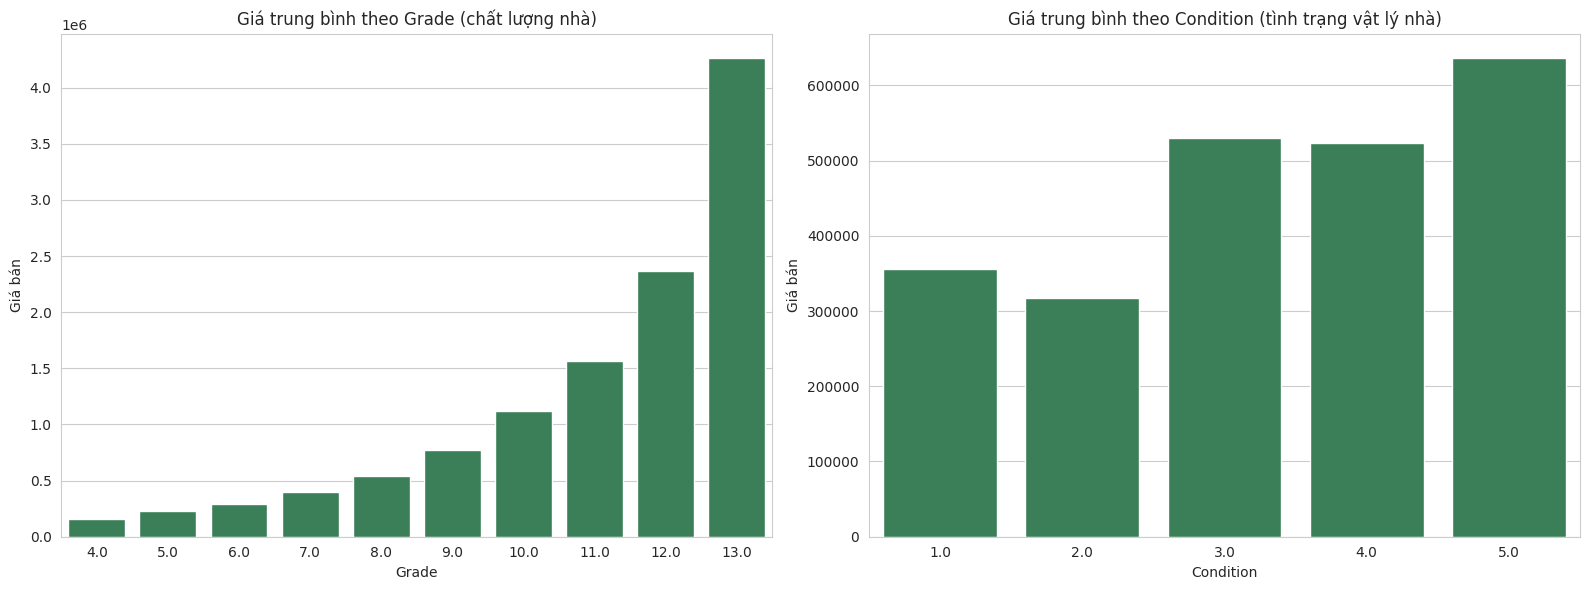

In [ ]:
# Tạo khung vẽ với 1 dòng, 2 cột
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ trung bình price theo grade
sns.barplot(data=df_cleaned, x='grade', y='price', ax=axes[0], ci=None, color='seagreen')
axes[0].set_title('Giá trung bình theo Grade (chất lượng nhà)')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Giá bán')

# Biểu đồ trung bình price theo condition
sns.barplot(data=df_cleaned, x='condition', y='price', ax=axes[1], ci=None, color='seagreen')
axes[1].set_title('Giá trung bình theo Condition (tình trạng vật lý nhà)')
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Giá bán')

# Căn chỉnh và hiển thị
plt.tight_layout()
plt.show()


Cả 2 biểu đồ đều cho thấy khi thang điểm về Grade và Condition tăng thì giá nhà cũng tăng lên đáng kể.

##4.3. Cấu trúc diện tích đất và tác động của chúng đến đặc tính cũng như giá trị căn nhà

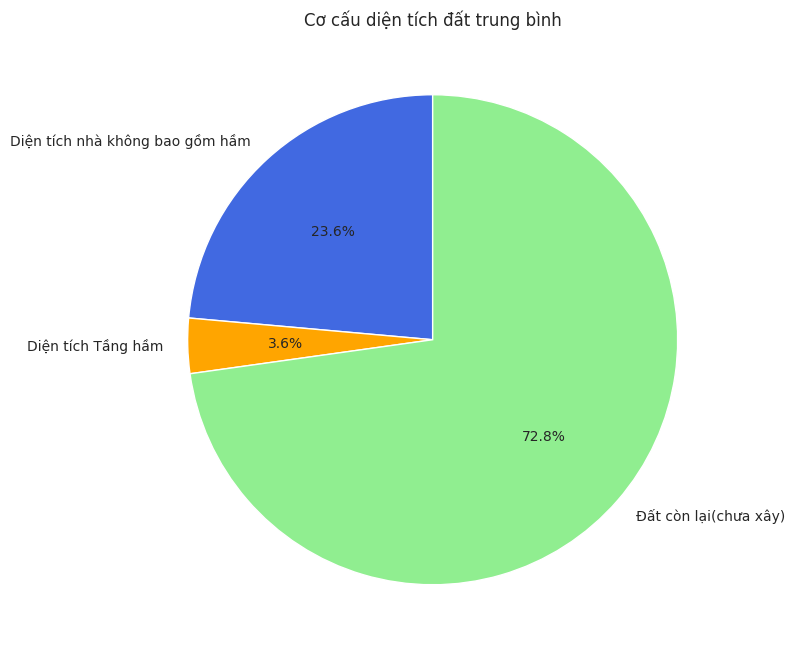

In [ ]:
# Tính trung bình các phần
avg_lot = df_cleaned['sqft_lot'].mean()
avg_above = df_cleaned['sqft_above'].mean()
avg_basement = df_cleaned['sqft_basement'].mean()
avg_built = avg_above + avg_basement
avg_unbuilt = avg_lot - avg_built

# Dữ liệu vẽ
sizes = [avg_above, avg_basement, avg_unbuilt]
labels = ['Diện tích nhà không bao gồm hầm', 'Diện tích Tầng hầm', 'Đất còn lại(chưa xây)']
colors = ['royalblue', 'orange', 'lightgreen']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Cơ cấu diện tích đất trung bình' )
plt.tight_layout()
plt.show()


Biểu đồ cho thấy cơ cấu diện tích đất trung bình được sử dụng như sau: phần lớn diện tích đất (72.8%) vẫn chưa được xây dựng, chỉ khoảng 23.6% dành cho diện tích nhà (không bao gồm tầng hầm), và tầng hầm chiếm tỷ lệ nhỏ nhất với 3.6%.

Seattle và các vùng ngoại ô lân cận (như Bellevue) thường theo phong cách quy hoạch đô thị thưa (low-density zoning), tức là mỗi căn nhà được xây trên lô đất rộng, để lại nhiều khoảng trống làm sân vườn, gara, hoặc đất chưa xây.


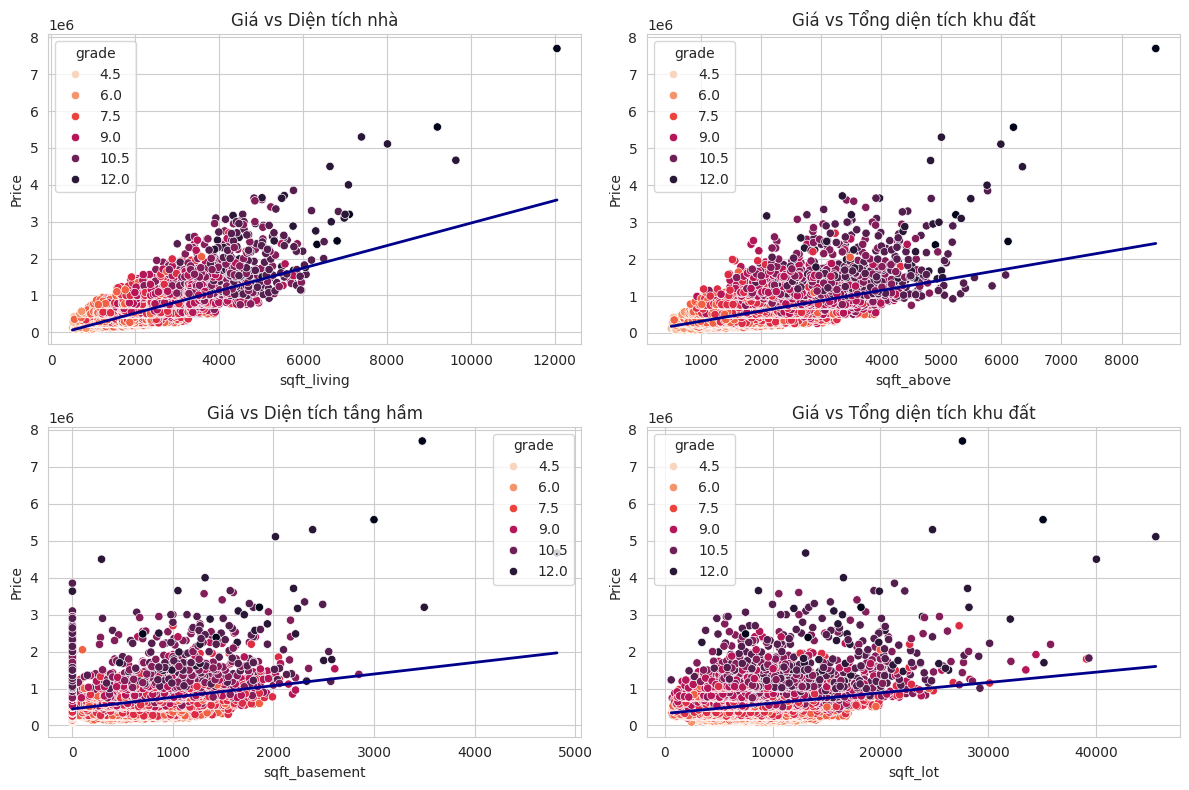

In [ ]:
# Tạo khung 2x2 cho 4 biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 hàng 2 cột
axes = axes.flatten()  # chuyển về mảng 1 chiều để dễ truy cập

# Danh sách các cặp trục x cần vẽ
x_vars = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot']
titles = ['Giá vs Diện tích nhà', 'Giá vs Tổng diện tích khu đất', 'Giá vs Diện tích tầng hầm', 'Giá vs Tổng diện tích khu đất']

# Vẽ từng biểu đồ
for i, (x_var, ax) in enumerate(zip(x_vars, axes)):
    # Vẽ scatterplot
    sns.scatterplot(
        data=df_cleaned,
        x=x_var,
        y='price',
        hue='grade',
        palette='rocket_r',
        ax=ax
    )

    # Vẽ đường hồi quy tuyến tính
    sns.regplot(
        data=df_cleaned,
        x=x_var,
        y='price',
        scatter=False,
        color='darkblue',  # màu đường
        line_kws={'linewidth': 2},  # độ dày đường
        ci=None,  # tắt vùng tin cậy
        ax=ax
    )

    # Đặt tiêu đề
    ax.set_title(titles[i])
    ax.set_xlabel(x_var)
    ax.set_ylabel("Price")

# Canh lề đẹp
plt.tight_layout()
plt.show()


Các biểu đồ trên cho thấy diện tích là yếu tố ảnh hưởng rõ rệt đến giá nhà. Trong đó, diện tích nhà (sqft_living) có tương quan mạnh nhất – diện tích càng lớn, giá càng cao, đặc biệt ở những căn có grade cao. Diện tích không bao gồm tầng hầm (sqft_above) cũng có xu hướng tương tự. Về diện tích tầng hầm và tổng diện tích đất tuy có ảnh hưởng nhưng phân tán còn khá nhiều.

Sau khi phân tích các biến liên quan đến diện tích, có thể thấy người mua thường ưu tiên diện tích sử dụng thực tế (như diện tích sinh hoạt) hơn là tổng diện tích khu đất. Tuy nhiên, những lô đất rộng vẫn mang lại tiềm năng đầu tư lớn nhờ phần đất trống có thể dùng để mở rộng, xây dựng hoặc phát triển trong tương lai. Đây là vấn đề người mua hoặc nhà đầu tư có thể cân nhắc.

Trong khi đó, người bán và mô giới có thể nhấn mạnh tiềm năng phát triển của khu đất về lâu dài trong chiến lược quảng bá để nâng cao giá trị căn nhà trong mắt người mua.

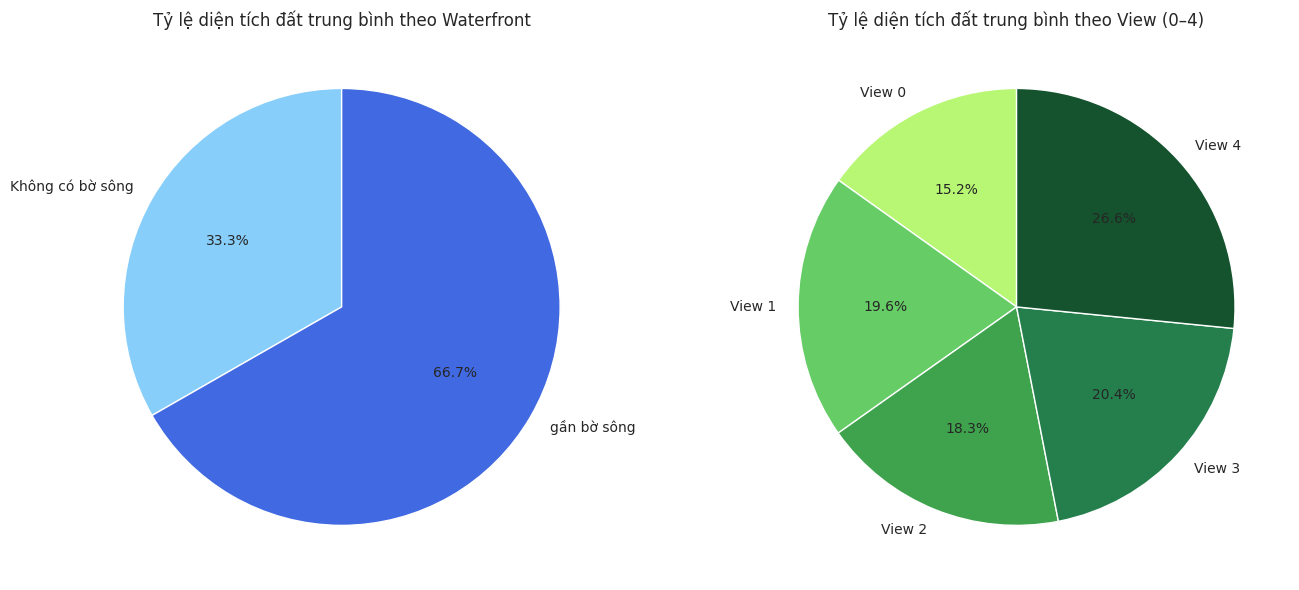

In [ ]:
# Tính trung bình sqft_lot theo waterfront
lot_by_waterfront = df_cleaned.groupby('waterfront')['sqft_lot'].mean()

# Tính trung bình sqft_lot theo view
lot_by_view = df_cleaned.groupby('view')['sqft_lot'].mean()

# Danh sách màu đẹp (tuỳ chỉnh thủ công)
view_colors = ['#b7f774', '#66cc66', '#3fa34d', '#247f4d', '#14532d']
wf_colors = ['lightskyblue','royalblue']

# Vẽ 2 biểu đồ tròn cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Waterfront
axes[0].pie(lot_by_waterfront,
            labels=['Không có bờ sông', 'gần bờ sông'],
            autopct='%1.1f%%',
            startangle=90,
            colors=wf_colors)
axes[0].set_title('Tỷ lệ diện tích đất trung bình theo Waterfront')

# Biểu đồ 2: View (0–4)
view_labels = [f'View {int(i)}' for i in lot_by_view.index]
axes[1].pie(lot_by_view,
            labels=view_labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=view_colors)
axes[1].set_title('Tỷ lệ diện tích đất trung bình theo View (0–4)')

plt.tight_layout()
plt.show()


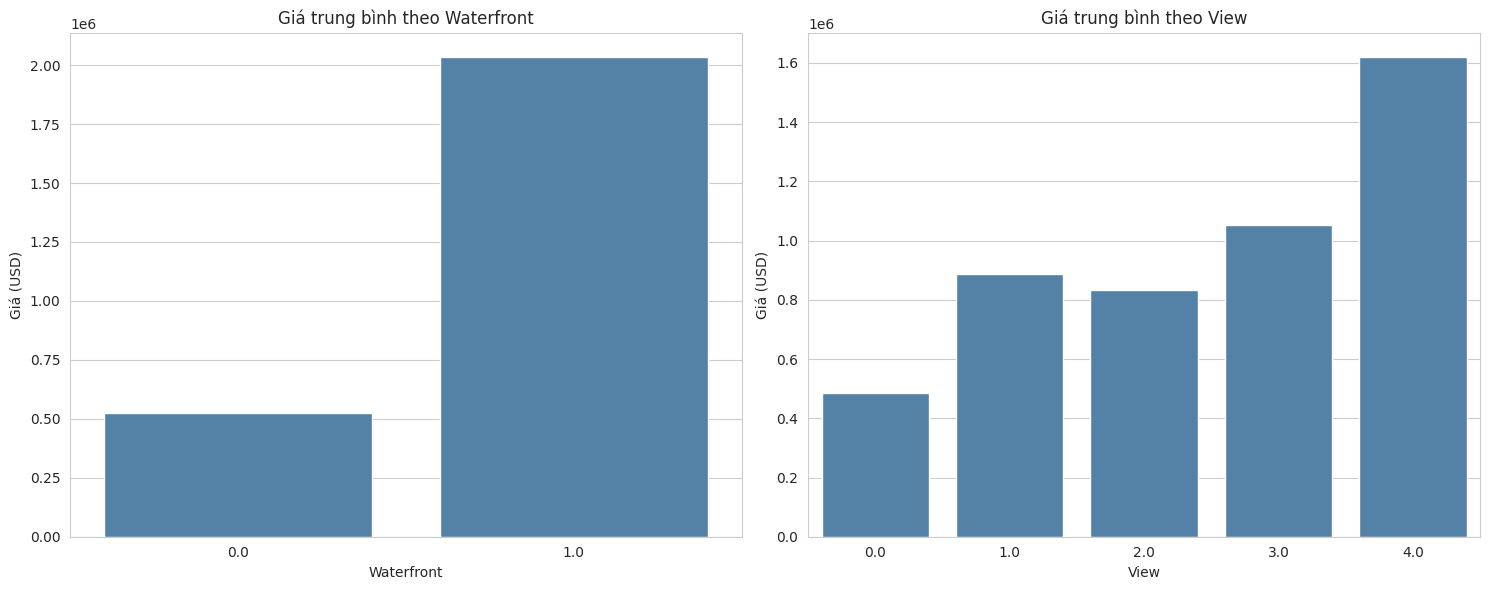

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Các biến ordinal cần vẽ
ordinal_vars = ['waterfront', 'view']

# Từ điển nhãn tiếng Việt
title_vi   = {'waterfront': 'Giá trung bình theo Waterfront',
              'view'      : 'Giá trung bình theo View'}
xlabel_vi  = {'waterfront': 'Waterfront',
              'view'      : 'View'}

# Tạo figure nằm ngang
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, var in enumerate(ordinal_vars):
    sns.barplot(
        x=var, y='price',
        data=df_cleaned,
        estimator=np.mean,
        ax=axes[i],
        errorbar=None,        # không vẽ error bar
        color='steelblue'
    )
    axes[i].set_title(title_vi[var])
    axes[i].set_xlabel(xlabel_vi[var])
    axes[i].set_ylabel('Giá (USD)')

plt.tight_layout()
plt.show()


Waterfront (Gần sông): Những căn nhà gần sông có diện tích đất trung bình lớn gấp đôi so với nhà không gần sông (66.7% vs 33.3%), đồng thời giá trung bình cao hơn gấp gần 4 lần. Điều này cho thấy nhà gần sông không chỉ đắt hơn vì vị trí, mà còn do sở hữu quỹ đất lớn — một yếu tố thu hút người mua cao cấp.

View (0–4): Tương tự, view càng đẹp thì diện tích trung bình đất càng cao, đồng thời giá nhà cũng tăng đều theo mức độ view. View 4 có diện tích đất trung bình chiếm hơn 26%, và giá trung bình cao hơn 3 lần so với View 0.

Đối với người bán và môi giới, nên nhấn mạnh lợi thế về cảnh quan, tầm nhìn và vị trí gần sông trong quá trình định giá và tiếp thị sản phẩm. Những đặc điểm này không chỉ làm tăng giá trị và sức hút thực tế của căn nhà, mà còn mang lại tiềm năng đầu tư dài hạn – yếu tố mà nhiều nhà đầu tư sẽ cân nhắc khi quyết định mua.

Về phía người mua, cần xem xét kỹ khả năng tài chính và mục tiêu sử dụng bất động sản. Các yếu tố như view đẹp hay gần sông tuy hấp dẫn,nhưng tăng giá nhà lên rất nhiều mà các yếu tố này không phải là nhu cầu thiết yếu hay đặc tính cơ bản của một căn nhà. Do đó, hãy cân nhắc liệu những yếu tố này có thực sự phù hợp với mục đích sử dụng thực tế của bạn, hay chỉ là giá trị cộng thêm không quá cần thiết.

##4.4. Giá nhà theo số phòng ngủ, phòng tắm và số tầng

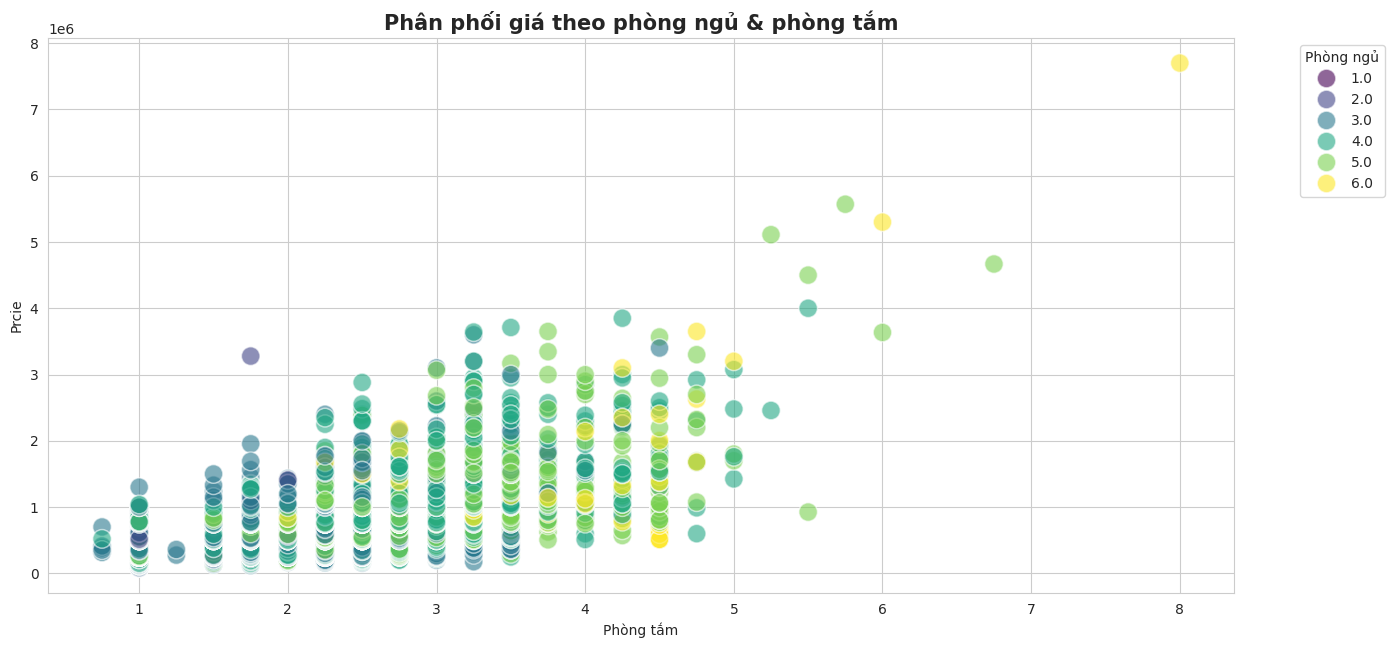

In [ ]:
plt.figure(figsize=(14,6.58))
sns.scatterplot(
    data=df_cleaned,
    x='bathrooms',
    y='price',
    size='bedrooms',
    hue='bedrooms',
    palette='viridis',
    alpha=0.6,
    sizes=(180, 180),
    s=2500
)


plt.title('Phân phối giá theo phòng ngủ & phòng tắm', fontsize=15, fontweight='bold')
plt.xlabel('Phòng tắm')
plt.ylabel('Prcie')
plt.legend(title='Phòng ngủ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Biểu đồ thể hiện xu hướng giá nhà tăng theo số lượng phòng tắm, đặc biệt khi vượt mức 4 phòng tắm thì giá có sự bứt phá rõ rệt. Số phòng ngủ (qua sắc độ màu) cũng cho thấy ảnh hưởng nhất định, nhưng không lớn bằng phòng tắm – nhiều căn có từ 3 đến 5 phòng ngủ nhưng mức giá vẫn phân tán rộng.

Từ đó, có thể thấy rằng phòng tắm là yếu tố ảnh hưởng mạnh hơn đến giá nhà so với phòng ngủ.

Với người bán, việc đầu tư cải tạo phòng tắm có thể là chiến lược nâng giá hiệu quả hơn. Với người mua, nên cân nhắc nhu cầu sử dụng thực tế để tránh trả thêm cho những tiện ích chưa chắc cần thiết.

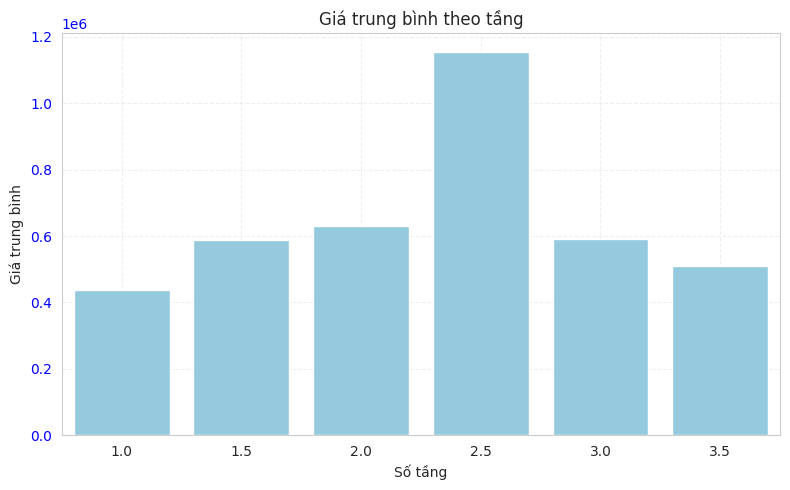

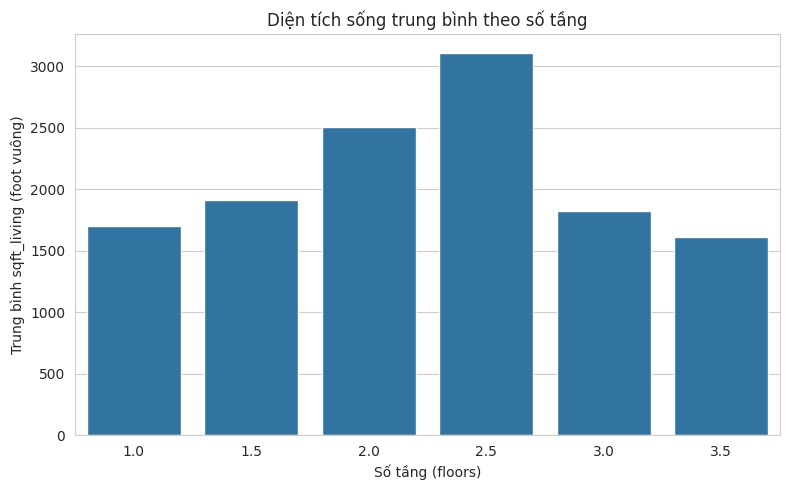

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính giá và grade trung bình theo số tầng
avg_data = df_cleaned.groupby('floors')[['price', 'grade']].mean().reset_index()

# Tạo 2 biểu đồ stacked dọc
fig, axes = plt.subplots(1, 1, figsize=(8,5), sharex=True)

# --- Biểu đồ 1: Chỉ Bar chart của Price ---
sns.barplot(x='floors', y='price', data=avg_data, ax=axes, color='skyblue')
axes.set_ylabel('Giá trung bình')
axes.set_xlabel('Số tầng')
axes.tick_params(axis='y', labelcolor='blue')
axes.set_title('Giá trung bình theo tầng')
axes.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
# Tính trung bình sqft_living theo floors (không thêm cột mới)
avg_sqft_by_floor = df_cleaned.groupby('floors')['sqft_living'].mean().reset_index()
avg_sqft_by_floor.columns = ['floors', 'avg_sqft_living']

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sqft_by_floor, x='floors', y='avg_sqft_living')
plt.title('Diện tích sống trung bình theo số tầng')
plt.xlabel('Số tầng (floors)')
plt.ylabel('Trung bình sqft_living (foot vuông)')
plt.tight_layout()
plt.show()

Từ biểu đồ, có thể thấy nhà có 2.5 tầng có giá trung bình cao vượt trội so với các mức tầng khác. Tuy nhiên, mức giá ở các tầng còn lại không chênh lệch nhiều. Do đó, cần xem xét thêm yếu tố diện tích sống trung bình, cho thấy nhà 2–2.5 tầng cũng có diện tích lớn nhất.
Có thể kết luận rằng không phải nhiều tầng là giá sẽ tăng mà phải xem tổng diện tích của từng tầng là như thế nào. Vì vậy, khi đánh giá giá trị nhà theo tầng, người mua và người bán cần đồng thời cân nhắc yếu tố diện tích sử dụng để có cái nhìn đầy đủ và chính xác hơn.




#5. Correlation

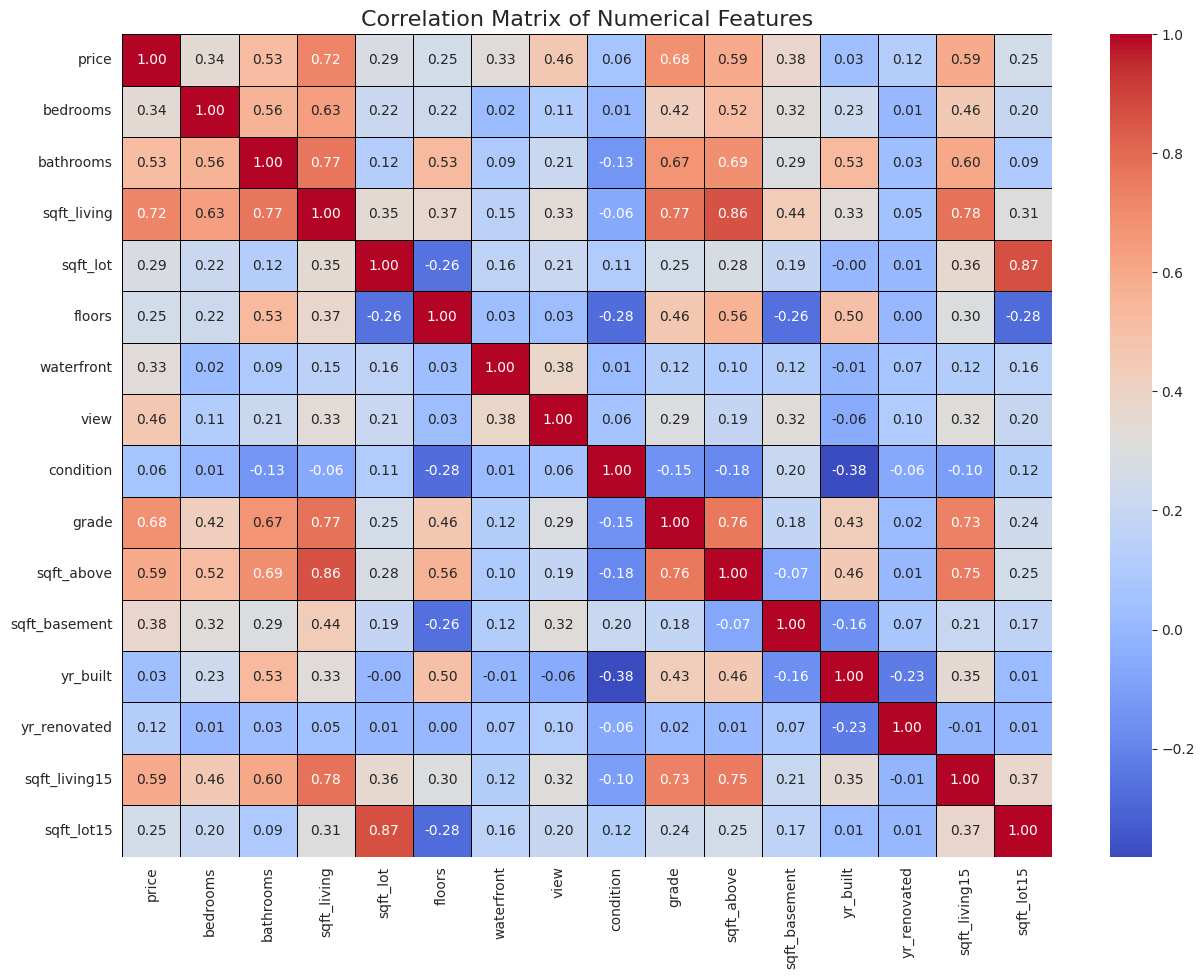

In [ ]:

# Removed the trailing comma to make it a list instead of a tuple containing a list
numeric_columns = ["date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"]

# Ensure 'date' is not included in the correlation calculation as it's datetime
# Create a temporary list excluding 'date' for correlation
cols_for_corr = [col for col in numeric_columns if col != 'date']

# Calculate correlation matrix using the list without 'date'
correlation_matrix = df_cleaned[cols_for_corr].corr()

# Vẽ heatmap
plt.figure(figsize=(15, 10.68))  # Kích thước lớn cho dễ nhìn
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",                   # Làm tròn 2 chữ số
    cmap="coolwarm",             # Màu sắc đẹp
    linewidths=0.6,              # Đường viền giữa các ô
    linecolor="black"            # Màu viền
)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

Xem xét không đưa 2 biến sqft_living15 và sqft_lot15 vào Linear Regression vì hai biến này có tương quan lớn với sqft_living và sqft_lot. Mà 2 biến bị loại này chỉ phản ánh diện tích trung bình của những căn nhà lân cận trong khu vực, mang tính gián tiếp và không đặc trưng cho căn nhà đang xét.

#6. Linear Regression & Forecasting

In [ ]:
from sklearn.model_selection import train_test_split
# Chọn các cột số phù hợp (loại bỏ 'date')
x = df_cleaned[[
    "bedrooms", "bathrooms", "sqft_living","sqft_lot", "floors",
    "waterfront", "view", "condition", "grade",
    "sqft_basement", "yr_built", "yr_renovated", "sqft_above" # Added sqft_above
]]
y = df_cleaned['price']

# Chia dữ liệu train-test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Thêm hằng số vào x_train
X_train = sm.add_constant(X_train)

# Chuyển kiểu dữ liệu để tránh lỗi
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

# Huấn luyện mô hình OLS
model = sm.OLS(y_train, X_train).fit()

# In kết quả
print(model.summary())
print(model.params.to_string(float_format='{:0.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2366.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:12   Log-Likelihood:            -1.5991e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11763   BIC:                         3.200e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.873e+06    1.7e+05     34.599

Xóa 2 biến sqft_lot và yr_renovated ra khỏi mô hình vì có p_value > 0.05

In [ ]:
from sklearn.model_selection import train_test_split
# Chọn các cột số phù hợp (loại bỏ 'date')
x = df_cleaned[[
    "bedrooms", "bathrooms", "sqft_living", "floors",
    "waterfront", "view", "condition", "grade",
    "sqft_basement", "yr_built", "sqft_above"
]]
y = df_cleaned['price']

# Chia dữ liệu train-test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Thêm hằng số vào x_train
X_train = sm.add_constant(X_train)

# Chuyển kiểu dữ liệu để tránh lỗi
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

# Huấn luyện mô hình OLS
model = sm.OLS(y_train, X_train).fit()

# In kết quả (summary and params of model_first)
print(model.summary())
print(model.params.to_string(float_format='{:0.2f}'.format))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2839.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:13   Log-Likelihood:            -1.5992e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11765   BIC:                         3.199e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.935e+06   1.61e+05     36.975

Mô hình được cảnh báo đang có đa cộng tuyến và hệ số bedrooms mang giá trị âm lớn là không hợp lý. Nên đã chuẩn hóa bằng 2 phương pháp Z-score và MaxMin

##6.1. Z-Score

In [ ]:
from sklearn.preprocessing import StandardScaler

# Bước 1: Chọn biến đầu vào
features = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
            "condition", "grade", "sqft_basement", "yr_built"]


# Bước 2: Chuẩn hóa X_train, X_test
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train[features])
X_test_scaled_array = scaler.transform(X_test[features])  # dùng transform thôi

# Đưa về DataFrame (với chỉ số khớp)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=features, index=X_test.index)

# Bước 3: Thêm constant & chạy OLS trên train
X_train_scaled_const = sm.add_constant(X_train_scaled)
model_scaled = sm.OLS(y_train, X_train_scaled_const).fit()

# Bước 4: In kết quả
print(model_scaled.summary())
print(model_scaled.params.to_string(float_format='{:.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2839.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:13   Log-Likelihood:            -1.5992e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11765   BIC:                         3.199e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.366e+05   1762.390    304.494

##6.2. Min-Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Import train_test_split

features = [
    "bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
    "condition", "grade", "sqft_basement", "yr_built"
]

# Chuẩn hóa MinMax cho tập train
scaler = MinMaxScaler()
X_train_scaled_array = scaler.fit_transform(X_train[features])

# Giữ lại index gốc để khớp với y_train
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=features, index=X_train.index)

# Thêm hằng số vào
X_train_scaled = sm.add_constant(X_train_scaled)

# Hồi quy tuyến tính OLS
model = sm.OLS(y_train, X_train_scaled).fit()

# In kết quả
print(model.summary())
print(model.params.to_string(float_format='{:.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2839.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:14   Log-Likelihood:            -1.5992e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11765   BIC:                         3.199e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           409.9178   1.21e+04      0.034

Hệ số bedrooms vẫn âm nên đã thử mô hình khác

##6.3. Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

features = [
    "bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
    "condition", "grade", "sqft_basement", "yr_built"
]

# Dữ liệu đầu vào
x_train = X_train[features]
y_train = y_train  # đã có từ trước

# ElasticNet model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(x_train, y_train)

# In hệ số
coefs = pd.Series(model.coef_, index=x_train.columns)
print(coefs[coefs != 0].sort_values())  # Chỉ in hệ số khác 0

bedrooms         -46586.220623
yr_built          -3411.454915
sqft_basement        12.654374
sqft_living         200.970121
condition         24490.545068
bathrooms         26918.334719
floors            31986.580528
waterfront        68727.707382
view              74338.629484
grade            114004.996979
dtype: float64


bedrooms vẫn âm nên tiếp tục thử phương án khác

##6.4. Price/sqft

In [ ]:
import statsmodels.api as sm

# Tạo biến Y mới: giá mỗi foot vuông
y_train_sqft = y_train / X_train['sqft_living']

# Chọn biến đầu vào từ tập train
features = [
    "bedrooms", "bathrooms", "floors", "waterfront", "view",
    "condition", "grade", "yr_built",'sqft_basement'
]
x_train_sqft = X_train[features]

# Thêm constant và ép kiểu float64
x_train_sqft = sm.add_constant(x_train_sqft)
x_train_sqft = x_train_sqft.astype('float64')

# Hồi quy tuyến tính
model = sm.OLS(y_train_sqft, x_train_sqft).fit()

# In kết quả
print(model.summary())
print(model.params.to_string(float_format='{:.2f}'.format))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     669.6
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:14   Log-Likelihood:                -69431.
No. Observations:               11776   AIC:                         1.389e+05
Df Residuals:                   11766   BIC:                         1.390e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3310.3823     73.850     44.826

Ra giả định bedrooms âm vì trong thực tế những căn nhà 2 phòng ngủ thường có giá/ft vuông rẻ hơn căn 1 phòng ngủ. Nên thay biến phụ thuộc y từ price thành price/sqft. Tuy nhiên mô hình có S-squared thấp cùng với việc các biến còn lại thường có xu hướng ảnh hưởng đến tổng giá trị căn nhà nhiều hơn, nên chuyển sang giả định khác

## 6.5. Final - Linear Regression

Sẽ gộp 2 biến độc lập bedrooms và sqft_above về thành 1. Bằng cách lấy sqft_above/bedrooms. Hệ số này cho thấy tỉ lệ diện tích trên phòng ngủ, tức là độ rộng rải của 1 căn nhà khi xét trên diện tích và phòng ngủ.

Cùng diện tích nhưng nhiều phòng ngủ hơn → tỷ lệ giảm → nhà chật hơn.

Cùng số phòng ngủ nhưng diện tích lớn hơn → tỷ lệ tăng → nhà rộng rãi hơn.

In [ ]:
import statsmodels.api as sm

# Ensure X_train, X_test, y_train, y_test are already defined from a previous train_test_split

# Select features for the model
features_for_model = [
    "bathrooms", "floors", "waterfront", "view",
    "condition", "grade", "yr_built", "sqft_basement","sqft_living"
]

# Create training data for the interaction model
x_train_interact = X_train[features_for_model].copy()
# Add the interaction term using columns from X_train
x_train_interact['sqft/bedrooms'] = X_train['sqft_above'] / X_train['bedrooms']

# Target variable
y_train_interact = y_train

# Add constant and set data type
x_train_interact = sm.add_constant(x_train_interact)
x_train_interact = x_train_interact.astype('float64')

# Linear regression model
model1 = sm.OLS(y_train_interact, x_train_interact).fit()

# Print results
print(model1.summary())
print(model1.params.to_string(float_format='{:.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2773.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:15   Log-Likelihood:            -1.6001e+05
No. Observations:               11776   AIC:                         3.200e+05
Df Residuals:                   11765   BIC:                         3.201e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.828e+06   1.62e+05     36.023

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split


# Lấy biến đầu vào từ tập train
features_for_interaction = ["bathrooms", "floors", "waterfront", "view", "condition", "grade", "yr_built", "sqft_basement","sqft_living"]
x_train_interact = X_train[features_for_interaction].copy()

# Thêm biến tương tác
x_train_interact['sqft/bedrooms'] = X_train['sqft_above'] / X_train['bedrooms']

# Lấy biến đầu vào từ tập test
x_test_interact = X_test[features_for_interaction].copy()

# Thêm biến tương tác vào tập test
x_test_interact['sqft/bedrooms'] = X_test['sqft_above'] / X_test['bedrooms']


# Mục tiêu
y_train_interact = y_train

# Chuẩn hóa MinMax
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_interact)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train_interact.columns, index=x_train_interact.index) # Set the index to match x_train_interact

# Scale the test data using the same scaler
x_test_scaled = scaler.transform(x_test_interact)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test_interact.columns, index=x_test_interact.index)


# Thêm constant và ép kiểu
x_train_scaled_const = sm.add_constant(x_train_scaled)
x_train_scaled_const = x_train_scaled_const.astype('float64')

# Add constant to scaled test set
x_test_scaled_const = sm.add_constant(x_test_scaled)
x_test_scaled_const = x_test_scaled_const.astype('float64')


# Hồi quy
model_final = sm.OLS(y_train_interact, x_train_scaled_const).fit()

# In kết quả
print(model_final.summary())
print(model_final.params.to_string(float_format='{:.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2773.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:37:15   Log-Likelihood:            -1.6001e+05
No. Observations:               11776   AIC:                         3.200e+05
Df Residuals:                   11765   BIC:                         3.201e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -8.38e+04   1.16e+04     -7.241

Chấp nhận mô hình này vì có R-Squared tương đối cao là 70.2% và các biến không có p_value > 0, các hệ số cũng thích hợp.

#7. Forecasting

TH1: Các yếu tố khác không đổi, view tăng từ 2 lên 3 và waterfront tăng từ 0 lên 1

In [ ]:
# 0. Tạo cột tương tác nếu cần
df_cleaned['sqft/bedrooms'] = df_cleaned['sqft_above'] / df_cleaned['bedrooms']
vars_model = list(model1.params.index)
vars_model.remove('const')

# 2. Giá trị mặc định (mean) nếu bạn muốn giữ nguyên
base = df_cleaned[vars_model].mean().to_dict()

# 3. Khởi tạo 2 kịch bản thử nghiệm
cases = []
# case 0: chưa waterfront, view=2
c0 = base.copy()
c0.update({
    'bathrooms':    3,
    'floors':       2,
    'waterfront':   0,
    'view':         2,
    'grade':        8,
    'yr_built':   1950,
    'sqft_basement':500,
    'sqft_living': 2290,
    'sqft/bedrooms':600
})
# case 1: đã waterfront, view=4
c1 = base.copy()
c1.update({
    'bathrooms':    3,
    'floors':       2,
    'waterfront':   1,
    'view':         3,
    'grade':        8,
    'yr_built':   1950,
    'sqft_basement':500,
    'sqft_living': 2290,
    'sqft/bedrooms':600
})
cases = [c0, c1]

# 4. Tạo DataFrame, add constant và predict
import pandas as pd, statsmodels.api as sm
test_data = pd.DataFrame(cases)
test_data = sm.add_constant(test_data, has_constant='add')
output = model1.predict(test_data)

# Create a DataFrame from the output series before trying to access columns
output_df = pd.DataFrame({'predicted_price': output})

output_df['predicted_price'] = output_df['predicted_price'].map(lambda x: f"{x:,.2f}")
print(output_df)

  predicted_price
0      845,362.93
1    1,636,357.07


TH2: Các yếu tố khác không đổi, tăng tỉ lệ sqft/bedrooms từ 600 lên 1600

In [ ]:
# 1. Lấy danh sách biến (không gồm 'const')
vars_model = list(model1.params.index)
vars_model.remove('const')

# 2. Giá trị mặc định (mean) nếu bạn muốn giữ nguyên
base = df_cleaned[vars_model].mean().to_dict()

# 3. Khởi tạo 2 kịch bản thử nghiệm
cases = []
# case 0: chưa waterfront, view=2
c0 = base.copy()
c0.update({
    'bathrooms':    3,
    'floors':       2,
    'waterfront':   0,
    'view':         2,
    'grade':        8,
    'yr_built':   1950,
    'sqft_basement':500,
    'sqft_living': 3290,
    'sqft/bedrooms':600
})
# case 1: đã waterfront, view=4
c1 = base.copy()
c1.update({
    'bathrooms':    3,
    'floors':       2,
    'waterfront':   0,
    'view':         2,
    'grade':        8,
    'yr_built':   1950,
    'sqft_basement':500,
    'sqft_living': 3290,
    'sqft/bedrooms':1600
})
cases = [c0, c1]

# 4. Tạo DataFrame, add constant và predict
import pandas as pd, statsmodels.api as sm
test_data = pd.DataFrame(cases)
test_data = sm.add_constant(test_data, has_constant='add')
output = model1.predict(test_data)

# Create a DataFrame from the output series before trying to access columns
output_df = pd.DataFrame({'predicted_price': output})

output_df['predicted_price'] = output_df['predicted_price'].map(lambda x: f"{x:,.2f}")
print(output_df)

  predicted_price
0      975,235.63
1    1,099,836.48


Kết quả dự đoán cho thấy tác động của các biến độc lập đến giá nhà là hợp lý và phù hợp với các phân tích đã thực hiện trước đó.

#8. Evaluating the Model

In [ ]:
import numpy as np

# ===== Dự đoán trên tập test =====
y_pred = model_final.predict(x_test_scaled_const)   # đã có cột const

# ===== Tính MSE và RMSE thủ công =====
mse  = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f"MSE : {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")


MSE : 45,080,965,130.60
RMSE: 212,322.79


In [ ]:
df_cleaned['price'].describe()

,price
count,1.472000e+04
mean,5.355619e+05
std,3.589020e+05
min,8.100000e+04
25%,3.190000e+05
50%,4.460000e+05
75%,6.450000e+05
max,7.700000e+06


So sánh với Giá trị Trung bình: Giá trị trung bình của cột price là 535.561 USD. RMSE bằng 212.323 USD, tương đương khoảng 39,6% của giá trung bình. Điều này cho thấy sai số dự đoán trung bình chiếm gần 40% của một mức giá nhà điển hình trong tập dữ liệu.

So sánh với Độ lệch Chuẩn: Độ lệch chuẩn của price là 358.902 USD. RMSE khoảng 59,2% độ lệch chuẩn. Điều này cho thấy sai số của mô hình bằng hơn một nửa mức biến động tự nhiên của dữ liệu, cho thấy mô hình còn có thể cải thiện.

Khoảng giá (Range): Giá nhà dao động từ 81.000 USD đến 7.700.000 USD, tức tổng biên độ 7.619.000 USD. RMSE 212.323 USD chiếm chỉ 2,8% của toàn bộ khoảng giá. Trong bối cảnh toàn thị trường, sai số này vẫn là một phần rất nhỏ so với biên độ giá.

Tóm tắt:

So với Trung bình: RMSE ≈ 39,6% của giá trung bình, cho thấy sai số tương đối lớn so với mức giá phổ biến.

So với Độ lệch Chuẩn: RMSE ≈ 59,2% σ, phản ánh sai số đáng kể so với độ biến thiên điển hình.

So với Khoảng giá: RMSE ≈ 2,8% biên độ dữ liệu, cho thấy trên quy mô toàn thị trường, sai số là rất nhỏ.

Tuy nhiên RMSE này vẫn có thể chấp nhận được với những tính chất sau

🔹 1. Đặc điểm của ngành: Giá nhà biến động rất lớn, đặc biệt ở những khu vực như Seattle hoặc Bellevue – nơi có những căn nhà cao cấp lên đến 7 triệu USD.

Tính chất của ngành BĐS là dữ liệu không đồng nhất, trải dài từ nhà giá rẻ đến biệt thự, nên khoảng dao động rất rộng.

🔹 2. So với tập dữ liệu: Giá trung bình của bạn là khoảng 535,561 USD, RMSE chiếm ~40% của giá trung bình.

Nhưng nếu nhìn vào range dữ liệu từ 81,000 đến 7.7 triệu USD, thì RMSE chỉ chiếm ~2.8% → sai số nhỏ nếu xét toàn thị trường.

🔹 3. Trong ứng dụng thực tế: Nếu mô hình dùng để phân tích xu hướng, đánh giá tổng quan hoặc hỗ trợ định giá sơ bộ, thì RMSE này là chấp nhận được.

Nhưng nếu để định giá chính xác từng căn cho giao dịch, cần giảm RMSE xuống nữa, hoặc nhóm phân khúc (theo khu vực, diện tích, phân khúc cao cấp/giá rẻ) để tăng độ chính xác.

📌 Kết luận: RMSE này tuy cao, nhưng vẫn hợp lý và chấp nhận được khi xem xét trong bối cảnh dữ liệu rộng, đa dạng và đặc thù ngành bất động sản. Tuy nhiên, nếu muốn tăng độ chính xác cho từng nhóm nhà, bạn nên phân cụm dữ liệu hoặc sử dụng thêm các mô hình nâng cao.
